In [1]:
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#Data

In [2]:
dataset <- "hasibur013/diabetes-dataset"
download_path <- "diabetes_data"

# Execute the Kaggle command
system(paste("kaggle datasets download", dataset, "-p", download_path, "--unzip"))

# Check downloaded files
list.files(download_path)

[1] "diabetes_dataset.csv"

In [3]:
# Provide the correct file path
data <- read.csv("diabetes_data/diabetes_dataset.csv")

# View the first few rows of the dataset
head(data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


## Replacing the Nulls (Zeros) with the mean

In [4]:
columns_to_replace <- c('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')


In [5]:
for (col in columns_to_replace) {
  mean_value <- mean(data[[col]], na.rm = TRUE)
  data[[col]][data[[col]] == 0] <- mean_value
}


In [6]:
str(data)  # Displays the structure of the dataset


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : num  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : num  72 66 64 66 40 ...
 $ SkinThickness           : num  35 29 20.5 23 35 ...
 $ Insulin                 : num  79.8 79.8 79.8 94 168 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [7]:
summary(data)  # Provides summary statistics for each column


  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:20.54  
 Median : 3.000   Median :117.00   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :121.68   Mean   : 72.25   Mean   :26.61  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.00   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 79.8   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 79.8   Median :32.00   Median :0.3725           Median :29.00  
 Mean   :118.7   Mean   :32.45   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Ou

# Handling Outliers

In [8]:
# Identify and handle outliers using the IQR method
for (col in columns_to_replace) {
  Q1 <- quantile(data[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(data[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1

  # Define outlier boundaries
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  # Cap outliers
  data[[col]][data[[col]] < lower_bound] <- lower_bound
  data[[col]][data[[col]] > upper_bound] <- upper_bound
}


# Exploratory Analysis

## 1- The average glucose levels among patients with and without diabetes

In [9]:
mean_glucose <- tapply(data$Glucose, data$Outcome, mean)
print(mean_glucose)


       0        1 
110.7054 142.1597 


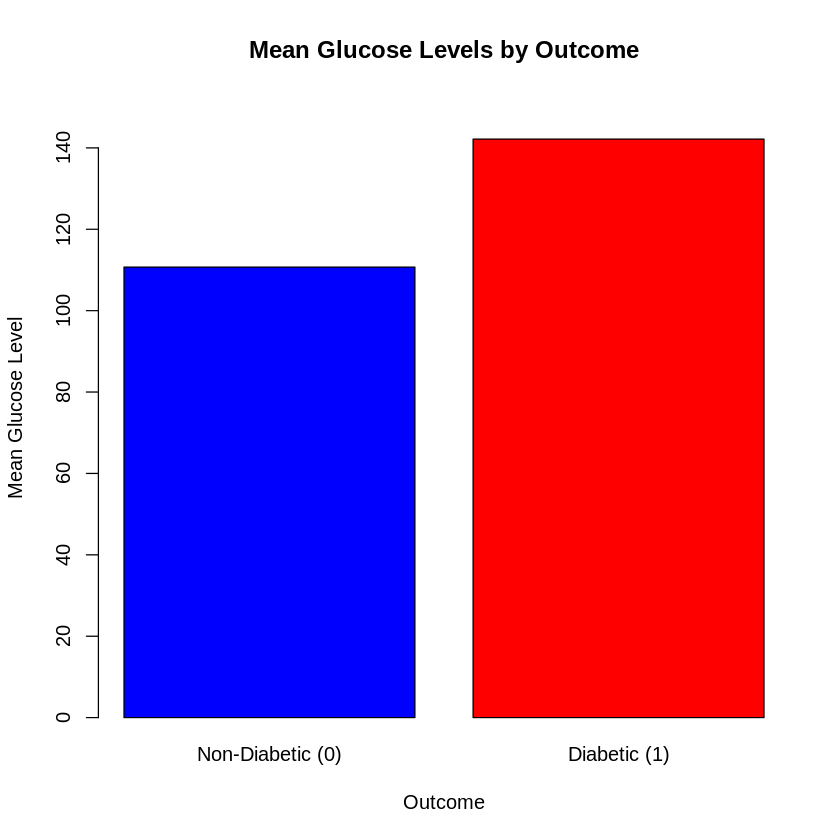

In [10]:
barplot(mean_glucose,
        main = "Mean Glucose Levels by Outcome",
        xlab = "Outcome",
        ylab = "Mean Glucose Level",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic (0)", "Diabetic (1)"),
        ylim = c(0, max(mean_glucose) + 10))


**Conclusion:**

The bar chart demonstrates that patients with diabetes have significantly higher average glucose levels compared to those without diabetes. The average glucose level for patients without diabetes is approximately 110 mg/dL, while for patients with diabetes, it is significantly higher at approximately 142 mg/dL.


##2- The average age of patients with and without diabetes.


In [12]:
mean_age <- tapply(data$Age, data$Outcome, mean)
print(mean_age)

       0        1 
31.19000 37.06716 


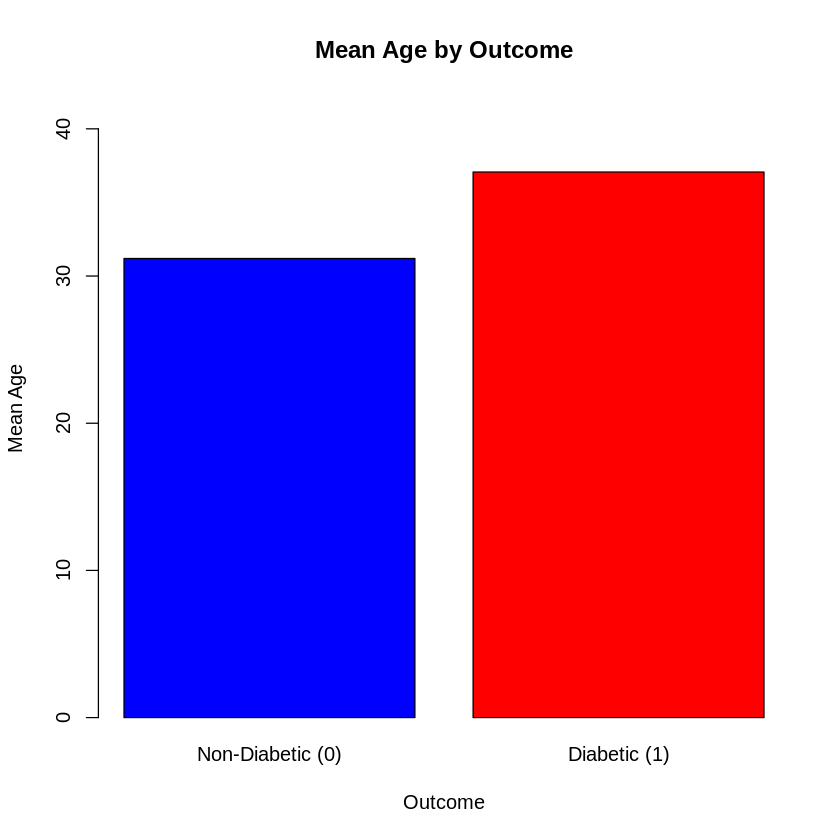

In [13]:
barplot(mean_age,
        main = "Mean Age by Outcome",
        xlab = "Outcome",
        ylab = "Mean Age",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic (0)", "Diabetic (1)"),
        ylim = c(0, max(mean_age) + 5))


**Non-Diabetic :** The blue bar indicates the mean age of patients without diabetes. It appears to be around 31 years.

**Diabetic :** The red bar represents the mean age of patients with diabetes. It seems to be approximately 37 years.

**Conclusion:** the average age of patients with diabetes is higher that those who are without diabetes.


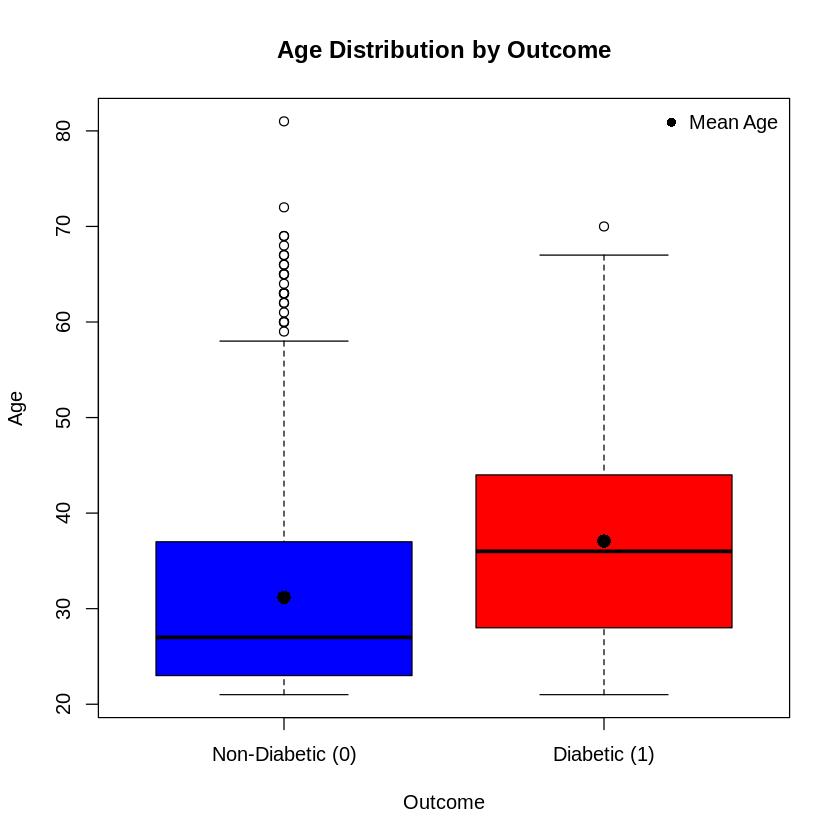

In [14]:
boxplot(data$Age ~ data$Outcome,
        main = "Age Distribution by Outcome",
        xlab = "Outcome",
        ylab = "Age",
        col = c("blue", "red"),
        names = c("Non-Diabetic (0)", "Diabetic (1)"))


points(1:2, mean_age, col = "black", pch = 16, cex = 1.5)
legend("topright", legend = "Mean Age", pch = 16, col = "black", bty = "n")


**Median Age:** The median age for the non-diabetic group appears to be around 27, while for the diabetic group, it's around 37. This suggests that diabetes might be more prevalent in older individuals.

**Age Range:** The age range for both groups is quite wide. The non-diabetic group seems to have a slightly wider range, extending from around 20 to 70, whereas the diabetic group's range appears to be from around 25 to 70.



---



##3- The average blood pressure measurements across diabetic and non-diabetic groups.

In [15]:
mean_bloodPressure<- tapply(data$BloodPressure	, data$Outcome, mean)  #applying mean
print(mean_bloodPressure)

       0        1 
70.80201 74.88316 


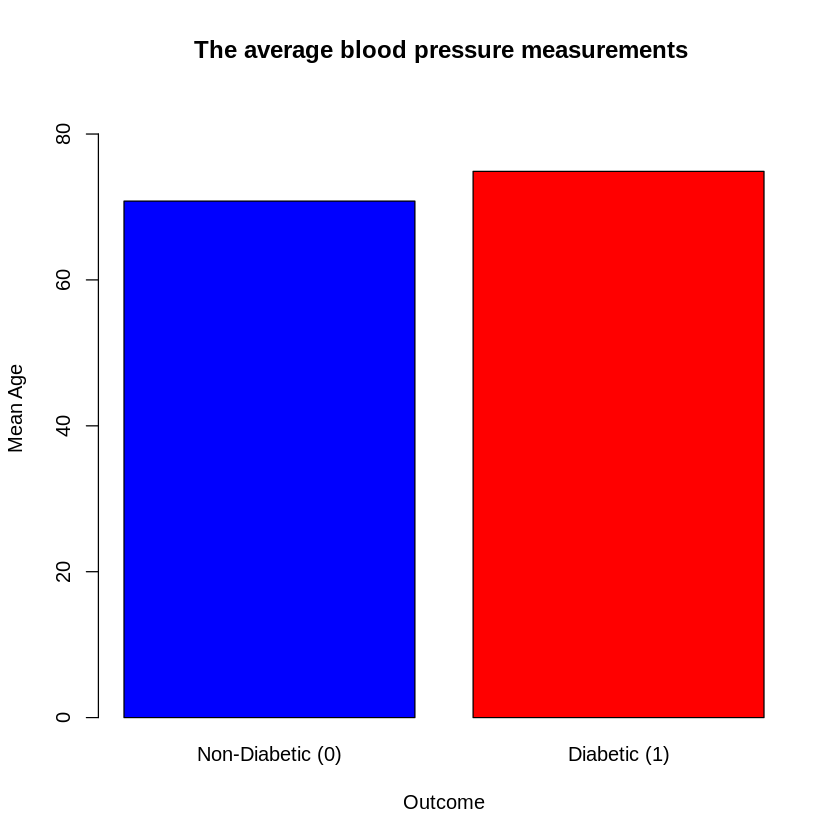

In [16]:
barplot(mean_bloodPressure,
        main = "The average blood pressure measurements ",
        xlab = "Outcome",
        ylab = "Mean Age",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic (0)", "Diabetic (1)"),
        ylim = c(0, max(mean_bloodPressure) + 10))

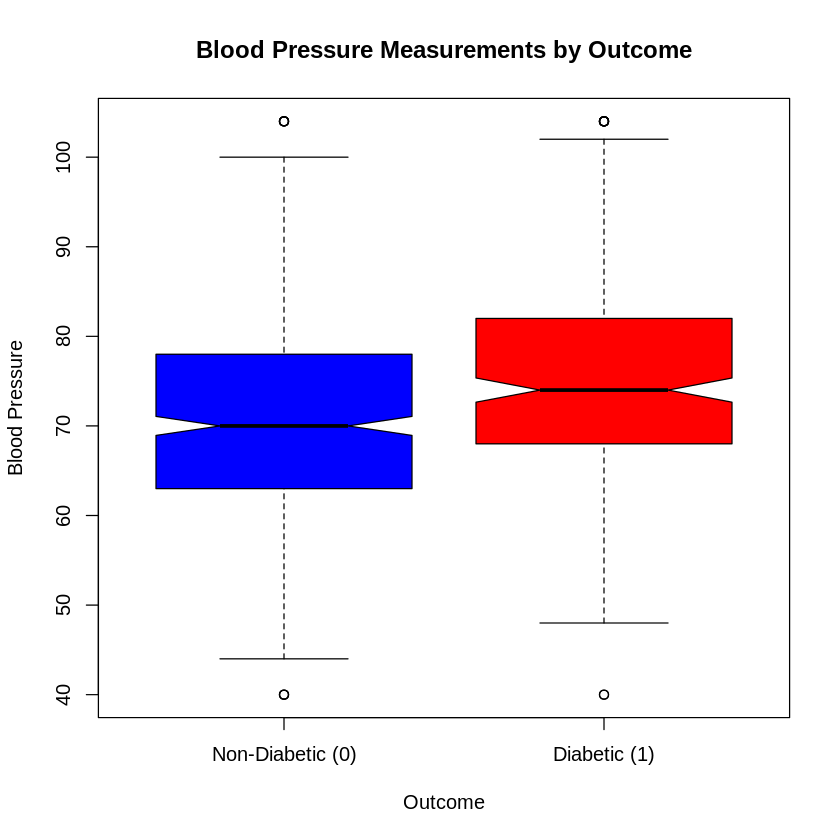

In [17]:
# Boxplot for blood pressure by outcome
boxplot(data$BloodPressure ~ data$Outcome,
        main = "Blood Pressure Measurements by Outcome",
        xlab = "Outcome",
        ylab = "Blood Pressure",
        col = c("blue", "red"),
        names = c("Non-Diabetic (0)", "Diabetic (1)"),
        border = "black",
        notch = TRUE)  # Adding notches to compare medians


**Non-Diabetic (0):** The blue bar indicates the mean blood pressure of patients without diabetes. It appears to be around 70.8 mmHg.

**Diabetic (1):** The red bar represents the mean blood pressure of patients with diabetes. It seems to be approximately 74 mmHg.

**Conclusion:**

The visualization indicate that the average blood pressure is significantly higher for patients with diabetes compared to those without diabetes.

`geom_smooth()` using formula = 'y ~ x'


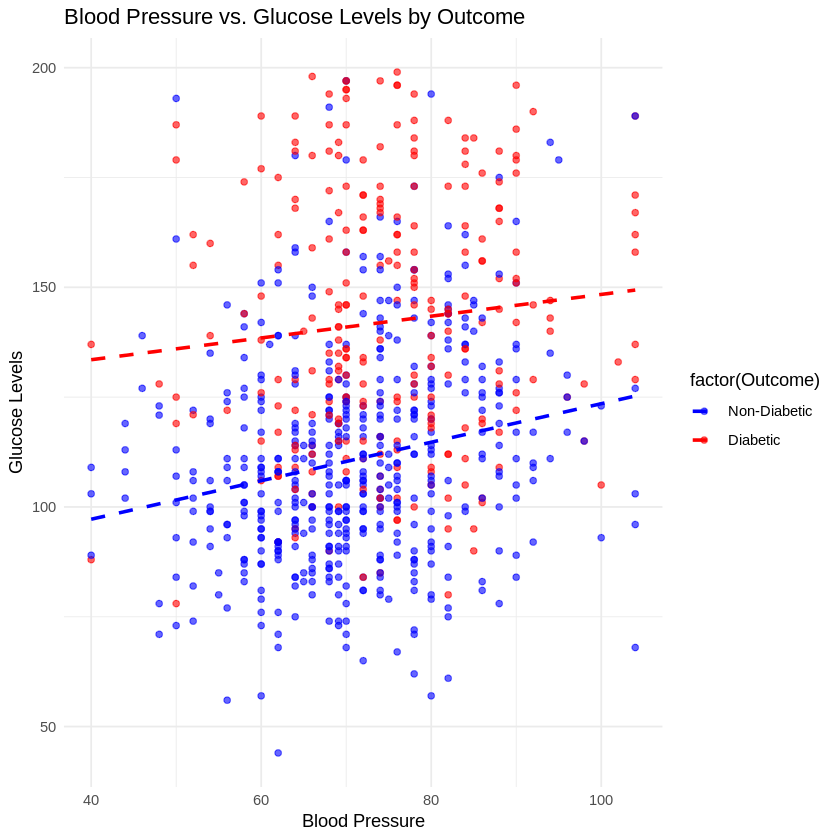

In [18]:
ggplot(data, aes(x = BloodPressure, y = Glucose, color = factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, aes(color = factor(Outcome)), linetype = "dashed") +
  labs(title = "Blood Pressure vs. Glucose Levels by Outcome",
       x = "Blood Pressure",
       y = "Glucose Levels") +
  scale_color_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()


**conclusion :** There is a positive association between blood pressure and glucose levels in both diabetic and non-diabetic individuals. However, the association is stronger in the diabetic group.

##4- The average BMI of diabetic versus non-diabetic patients.


In [19]:
mean_bmi <- tapply(data$BMI	, data$Outcome, mean)
print(mean_bmi)

       0        1 
30.86187 35.23800 


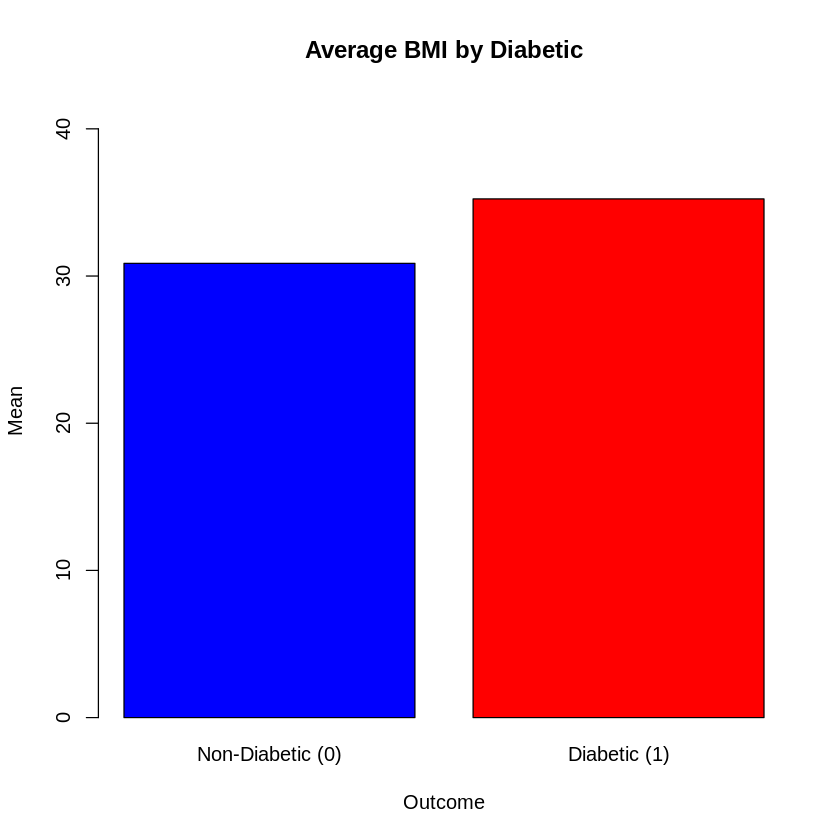

In [20]:
barplot(mean_bmi,
        main = "Average BMI by Diabetic",
        xlab = "Outcome",
        ylab = "Mean ",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic (0)", "Diabetic (1)"),
        ylim = c(0, max(mean_age) + 5))

**Non-Diabetic (0):** The blue bar indicates the mean BMI of patients without diabetes. It appears to be around 30 kg/m2.

**Diabetic (1):** The red bar represents the mean BMI of patients with diabetes. It seems to be approximately 38 kg/m2.
Conclusion:

The visualization shows that the average BMI is significantly higher for patients with diabetes compared to those without diabetes.

##5- The rate of diabetes among patients in the dataset.

In [21]:
diabetes <- sum(data$Outcome == 1)
patients <- nrow(data)
rate <- diabetes / patients
print(rate*100)

[1] 34.89583


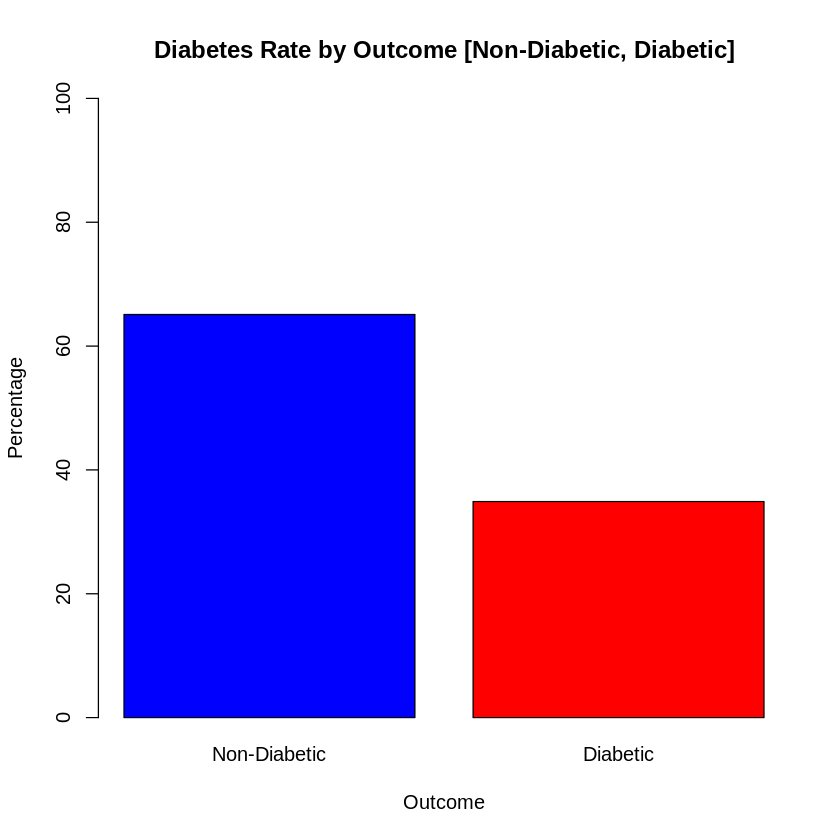

In [22]:
rate_non_diabetic <- (patients - diabetes) / patients * 100
rate_diabetic <- rate * 100

barplot(c(rate_non_diabetic, rate_diabetic),
        main = "Diabetes Rate by Outcome [Non-Diabetic, Diabetic]",
        xlab = "Outcome",
        ylab = "Percentage",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic", "Diabetic"),
        ylim = c(0, 100))


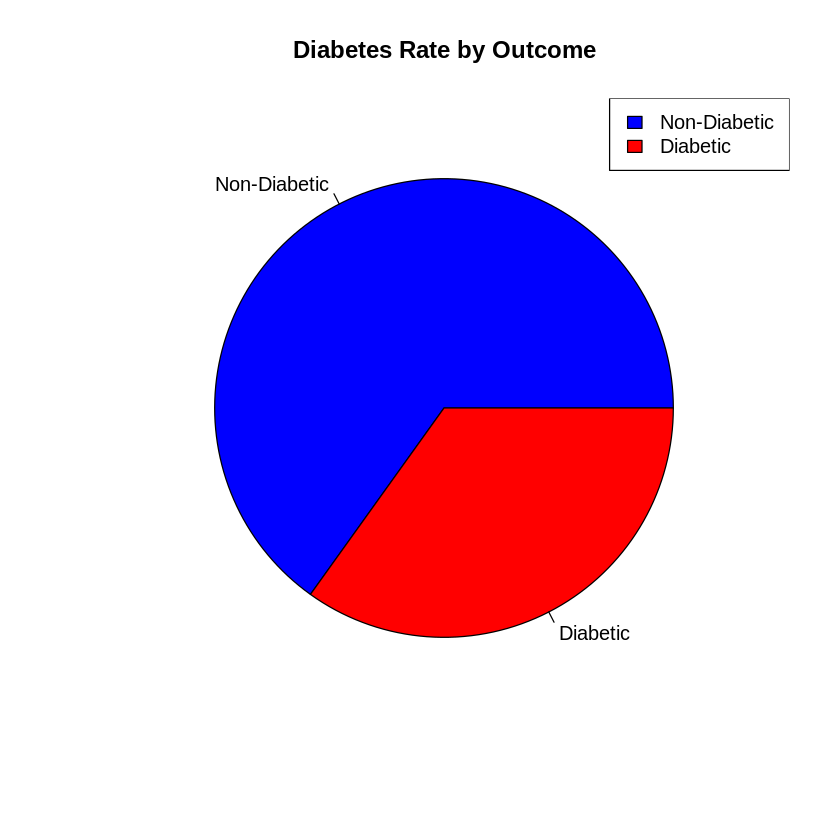

In [23]:
# Create a vector of percentages
percentages <- c(rate_non_diabetic, rate_diabetic)

# Create a vector of labels
labels <- c("Non-Diabetic", "Diabetic")
pie(percentages, labels = labels, main = "Diabetes Rate by Outcome", col = c("blue", "red"))
# Add a legend
legend("topright", legend = labels, fill = c("blue", "red"))

**Non-Diabetic:**  It is around 65%.

**Diabetic:** it around is 35%.  

**Conclusion:**

The visualization shows that approximately 35% of the patients in the dataset have diabetes, while the remaining 65% are non-diabetic.



```
# This is formatted as code
```

##6- The distribution of BMI values among all patients.



In [24]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



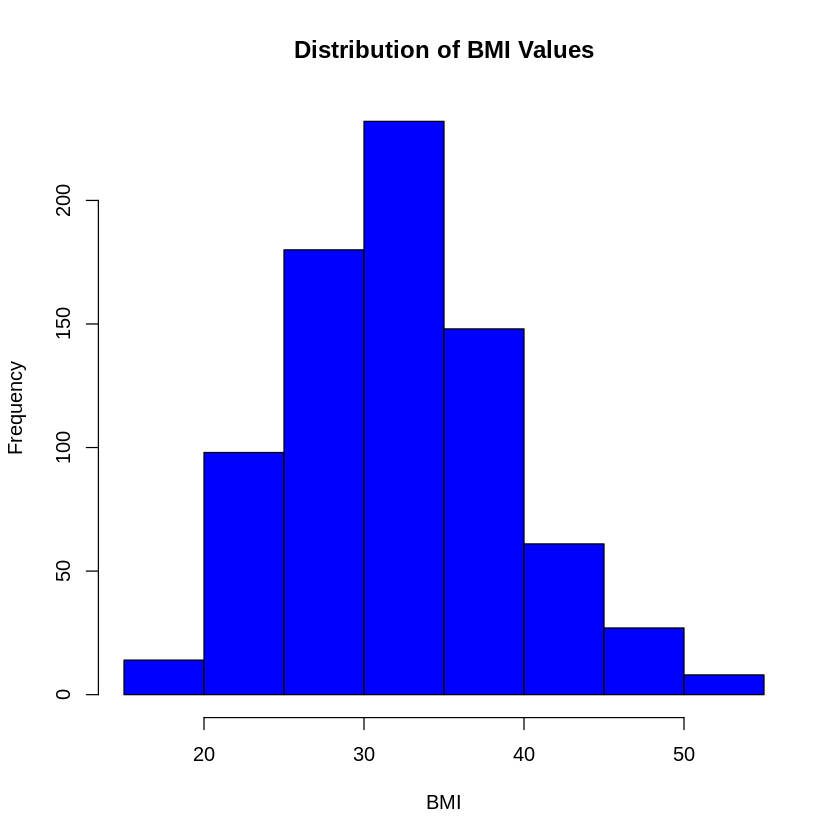

In [25]:
hist(data$BMI,
     main = "Distribution of BMI Values",
     xlab = "BMI",
     col = "blue",
     border = "black",
     )

**Conclusion**
The distribution of BMI values among the patients is right-skewed, with a mean BMI of 32.45 and a median of 32. This indicates that a larger proportion of patients have lower BMI values, while a smaller proportion have higher values. The standard deviation of 6.88 suggests a moderate level of variability in BMI within the sample.

##7- The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.

In [26]:
# Create separate datasets for diabetic and non-diabetic patients
diabetic <- data[data$Outcome == 1, ]
non_diabetic <- data[data$Outcome == 0, ]

In [27]:
# Define a common range for breaks to ensure consistency between histograms
breaks_range <- seq(min(data$DiabetesPedigreeFunction), max(data$DiabetesPedigreeFunction), length.out = 11)

# Set up the plotting area for side-by-side histograms
par(mfrow = c(1, 2))  # Two plots in one row



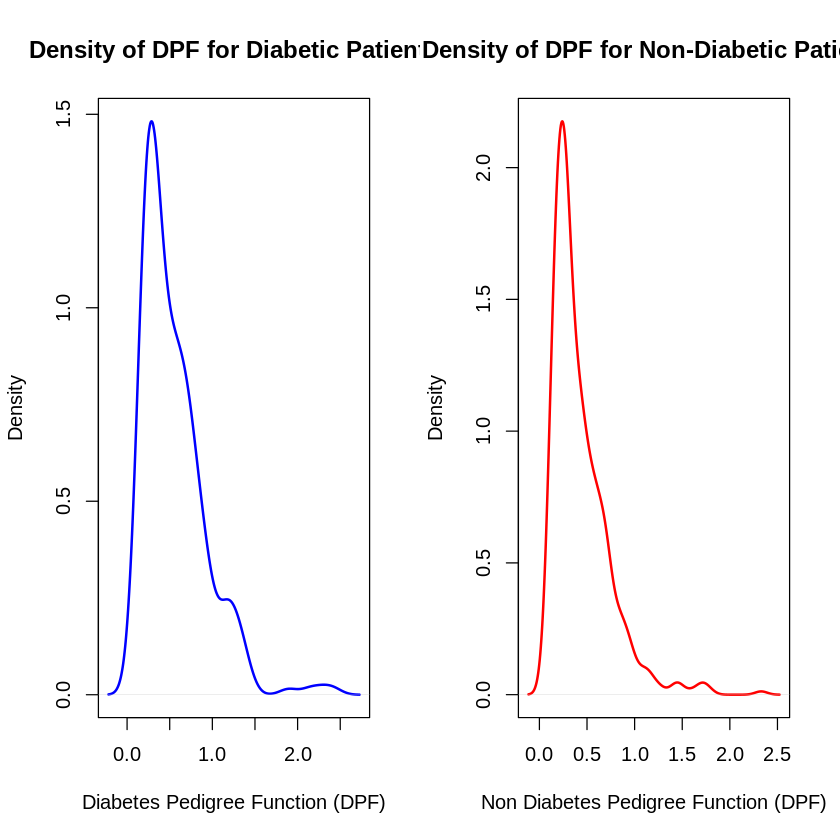

In [28]:

# Set up the plotting area for side-by-side density plots
par(mfrow = c(1, 2))

# Density plot for diabetic patients
plot(density(diabetic$DiabetesPedigreeFunction),
     main = "Density of DPF for Diabetic Patients",
     xlab = "Diabetes Pedigree Function (DPF)",
     col = "blue", lwd = 2)

# Density plot for non-diabetic patients
plot(density(non_diabetic$DiabetesPedigreeFunction),
     main = "Density of DPF for Non-Diabetic Patients",
     xlab = "Non Diabetes Pedigree Function (DPF)",
     col = "red", lwd = 2)


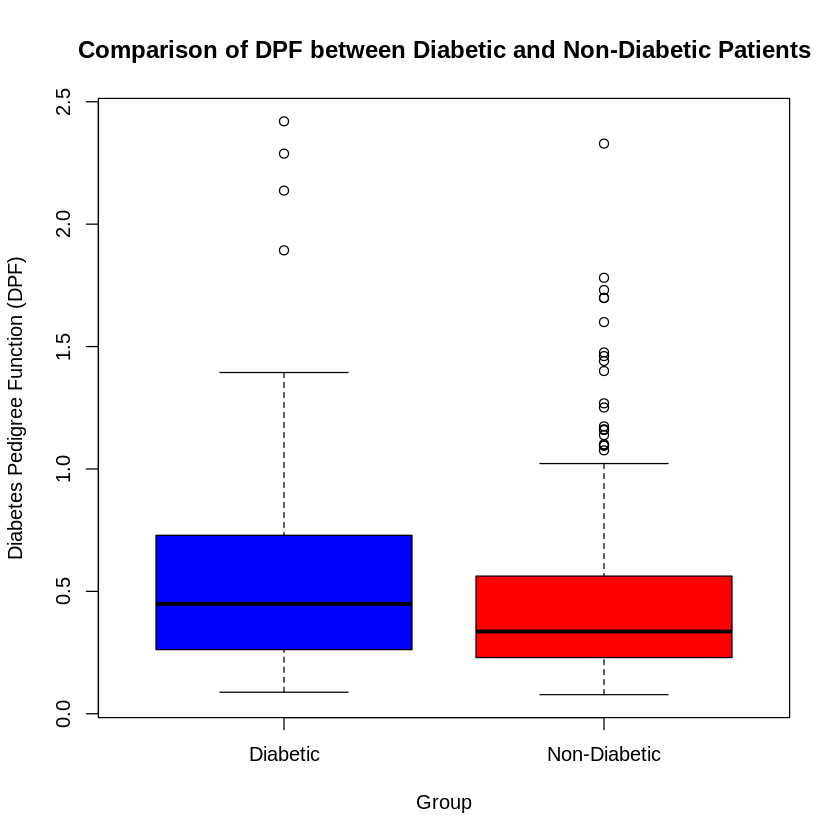

In [29]:
# Reset the plotting layout
par(mfrow = c(1, 1))

# Combine data for boxplot
combined_data <- data.frame(
  DPF = c(diabetic$DiabetesPedigreeFunction, non_diabetic$DiabetesPedigreeFunction),
  Outcome = factor(c(rep("Diabetic", nrow(diabetic)), rep("Non-Diabetic", nrow(non_diabetic))))
)

# Boxplot to compare DPF between diabetic and non-diabetic patients
boxplot(DPF ~ Outcome, data = combined_data,
        main = "Comparison of DPF between Diabetic and Non-Diabetic Patients",
        xlab = "Group", ylab = "Diabetes Pedigree Function (DPF)",
        col = c("blue", "red"), border = "black")


**Conclusion:**

Diabetic patients exhibit a higher median DPF compared to non-diabetic patients, indicating a stronger family history of diabetes in this group.

##8- The relationship between the number of pregnancies and diabetes occurrence.

In [30]:
mean_pregnancies <- tapply(data$Pregnancies, data$Outcome, mean)

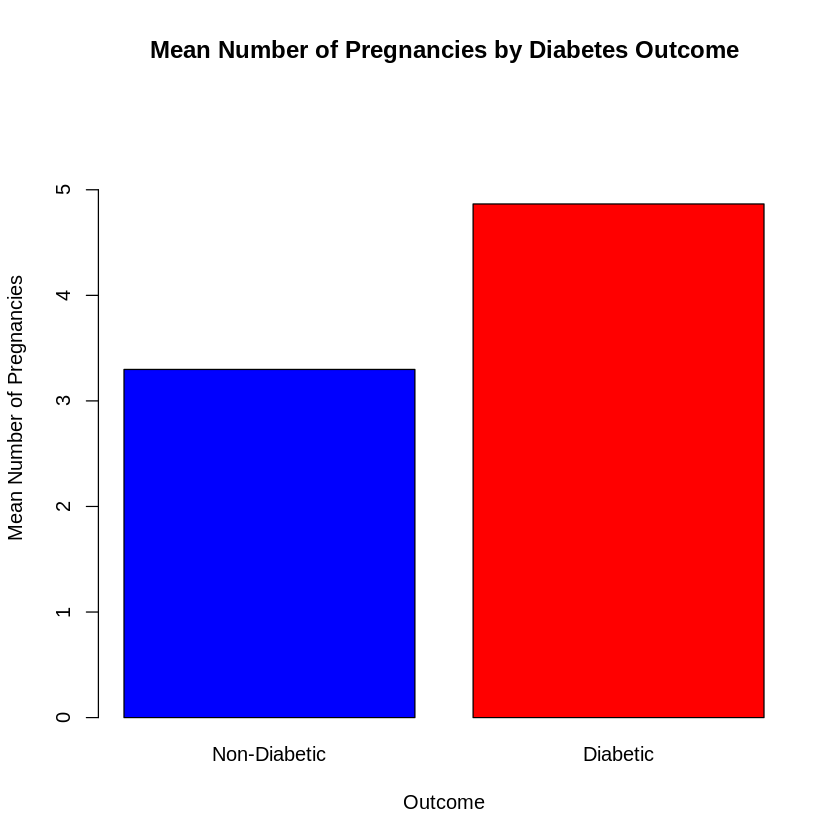

In [31]:
barplot(mean_pregnancies,
        main = "Mean Number of Pregnancies by Diabetes Outcome",
        xlab = "Outcome",
        ylab = "Mean Number of Pregnancies",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic", "Diabetic"),
        ylim = c(0, max(mean_pregnancies) + 1))

**Conclusion:**

The bar plot reveals a clear association between the number of pregnancies and the risk of developing diabetes. On average, individuals with diabetes have a higher mean number of pregnancies compared to those without diabetes.

##9- The correlation between glucose levels and BMI.


In [32]:
correlation <- cor(data$Glucose, data$BMI)
print(paste("Correlation between Glucose and BMI:", correlation))


[1] "Correlation between Glucose and BMI: 0.234040881927763"


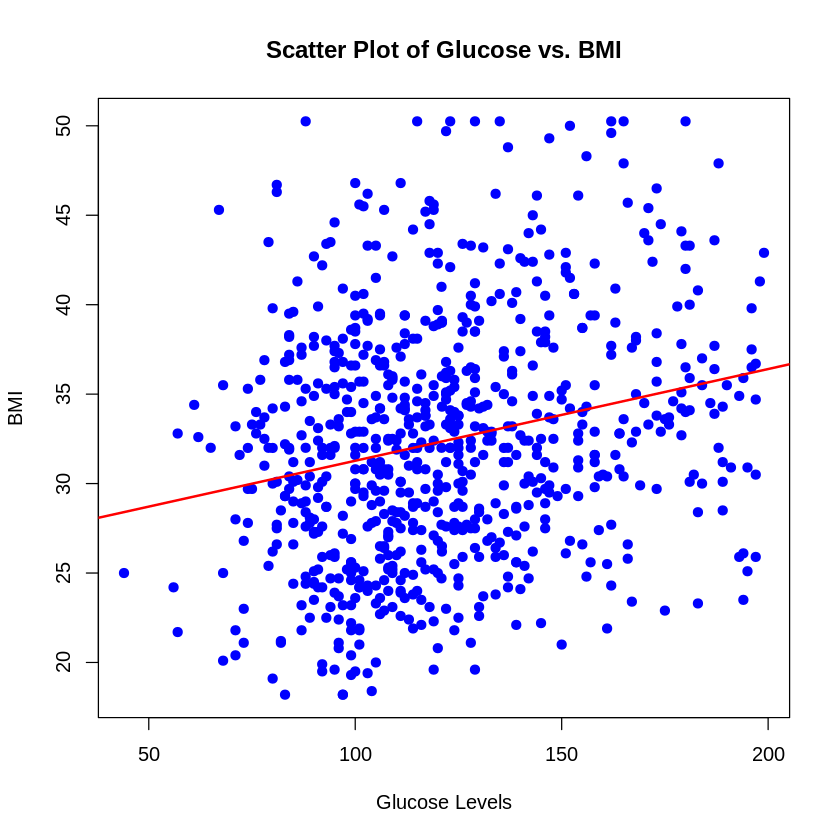

In [33]:
plot(data$Glucose, data$BMI,
     main = "Scatter Plot of Glucose vs. BMI",
     xlab = "Glucose Levels",
     ylab = "BMI",
     col = "blue",
     pch = 19)  # Solid circle points

# Add a regression line to highlight the trend
abline(lm(data$BMI ~ data$Glucose), col = "red", lwd = 2)


**Conclusion:**
The correlation coefficient of 0.23 indicate a weak positive correlation between Glucose Levels and BMI.So the relation is not very strong

## 10- The trend of glucose levels with age among diabetic and non-diabetic patients.


In [34]:
library(ggplot2)
library(dplyr)

`geom_smooth()` using formula = 'y ~ x'


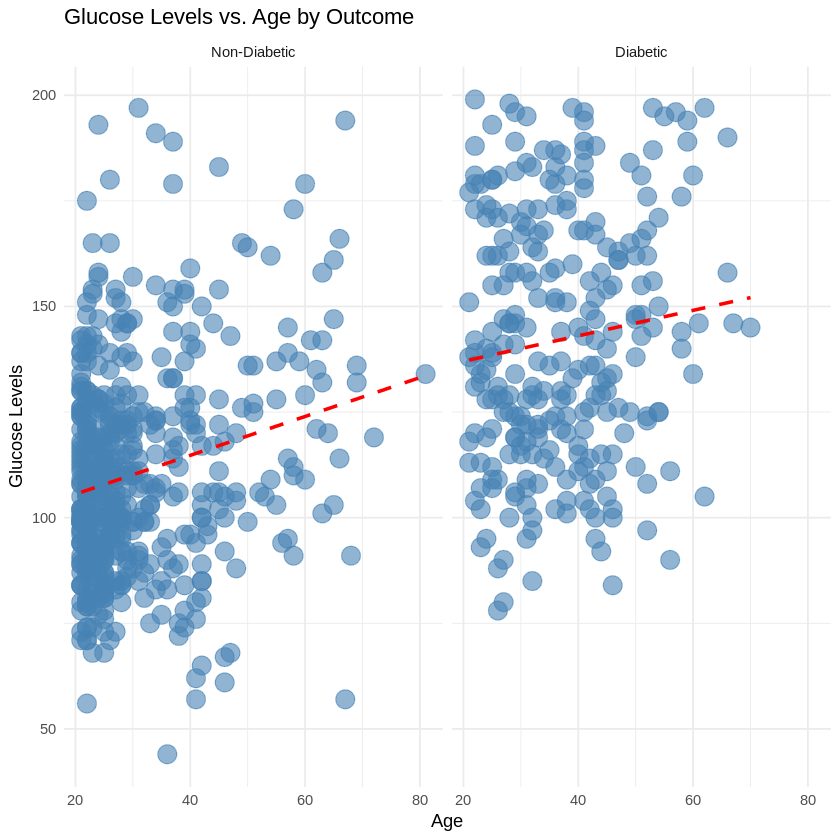

In [35]:

ggplot(data, aes(x = Age, y = Glucose)) +
  geom_point(alpha = 0.6, size = 5, color = "steelblue") +  # Add scatter points
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +  # Add trend lines
  facet_wrap(~ Outcome, labeller = as_labeller(c(`0` = "Non-Diabetic", `1` = "Diabetic"))) +
  labs(title = "Glucose Levels vs. Age by Outcome",
       x = "Age",
       y = "Glucose Levels") +
  theme_minimal()


**Conclusion:**

The scatter plot reveals that glucose levels tend to increase with age in both diabetic and non diabetic individuals. However, the rate of increase shows that it is higher in diabetic patients.



---



# PART 2

# SECTION 2.1

# 1 Are higher glucose levels associated with a greater likelihood of diabetes?


In [36]:
# Statistics
# Perform a t-test
# Descriptive Statistics
non_diabetic<-summary(data$Glucose[data$Outcome == 0])
diabetic<-summary(data$Glucose[data$Outcome == 1])
print(non_diabetic)
print(diabetic)

t_test <- t.test(Glucose ~ Outcome, data = data)
print(t_test)
#conclusion: that show h_alternative is true means that glocose level affect diabetes


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.0    93.0   107.5   110.7   125.0   197.0 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   78.0   119.0   140.0   142.2   167.0   199.0 

	Welch Two Sample t-test

data:  Glucose by Outcome
t = -14.862, df = 469.5, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -35.61301 -27.29558
sample estimates:
mean in group 0 mean in group 1 
       110.7054        142.1597 



The Bar chart was used to display the distribution of glucose levels across diabetic and non diabetic categories

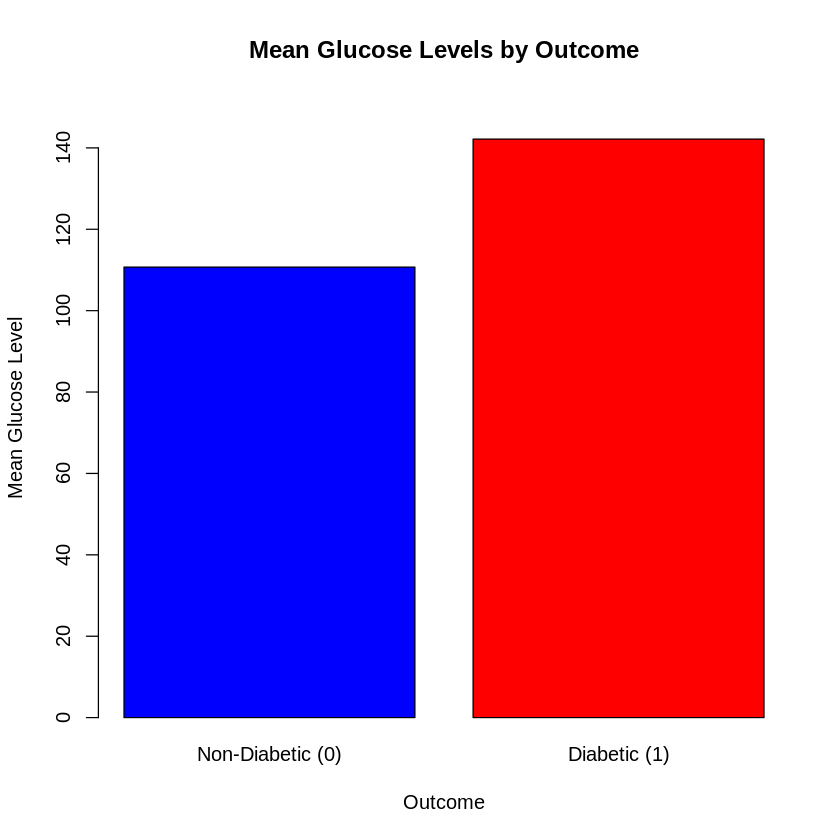

In [37]:
barplot(mean_glucose,
        main = "Mean Glucose Levels by Outcome",
        xlab = "Outcome",
        ylab = "Mean Glucose Level",
        col = c("blue", "red"),
        names.arg = c("Non-Diabetic (0)", "Diabetic (1)"),
        ylim = c(0, max(mean_glucose) + 10))  # Add some padding to the y-axis


I see boxplot will be suitable as it will show mean ,median ,interquartile also the outliers fot glucose level with respect to diabetes

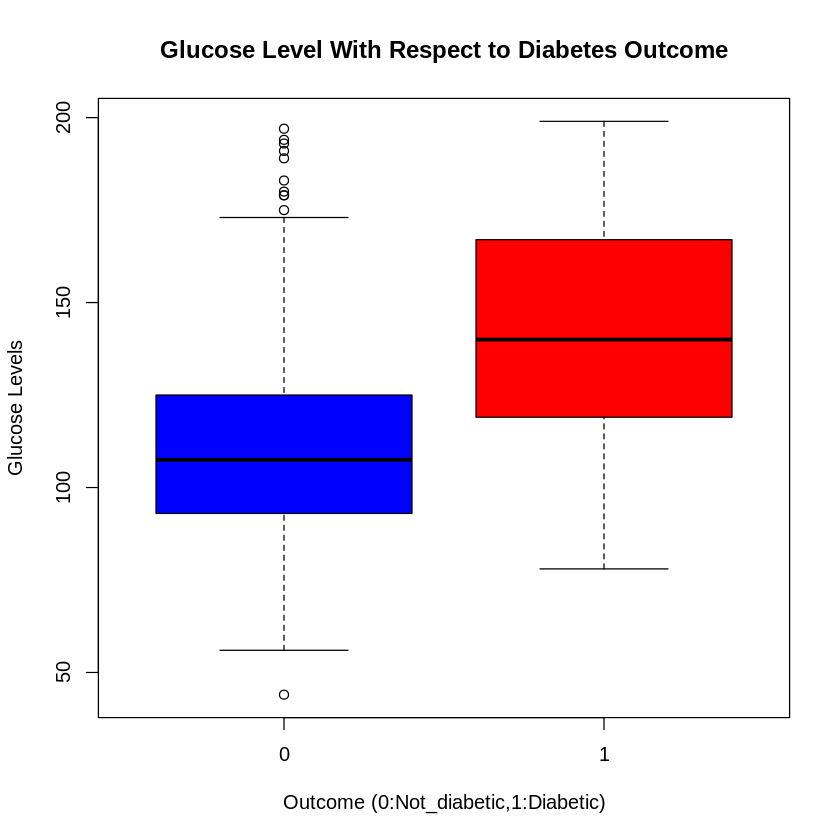

In [38]:
# Start to visualize with boxplot as it will answe all the relate dquestion to that question
boxplot(Glucose ~ Outcome, data = data,
        main = "Glucose Level With Respect to Diabetes Outcome",
        xlab = "Outcome (0:Not_diabetic,1:Diabetic)",
        ylab = "Glucose Levels",
        col = c("blue", "Red"))



1.   Set a glucose threshold of 155.
2.   Filter data for individuals with glucose levels above the threshold.
3.  Calculate the total number of individuals with high glucose.
4.  Count the number of individuals with high glucose who have diabetes (Outcome = 1).
5.  Calculate the percentage of people with high glucose who have diabetes.





In [39]:
glucose_threshold <- 155

high_glucose_data <- data[data$Glucose > glucose_threshold, ]

total_high_glucose <- nrow(high_glucose_data)

diabetes_in_high_glucose <- sum(high_glucose_data$Outcome == 1)

percentage_diabetes <- (diabetes_in_high_glucose / total_high_glucose) * 100

print(paste("Percentage of people with high glucose who have diabetes:", round(percentage_diabetes, 2), "%"))


[1] "Percentage of people with high glucose who have diabetes: 80.34 %"


Conclusion: **Yes** higher glucose levels are strongly associated with a greater likelihood of diabetes as shown in the visualizations and statistics

# 2 Are patients with high glucose concentrations also likely to have higher BMI values?


In [40]:
# statistics
cor(data$Glucose, data$BMI)


[1] 0.2340409

I choose the scatter plot to see if there is any observable trend in the data

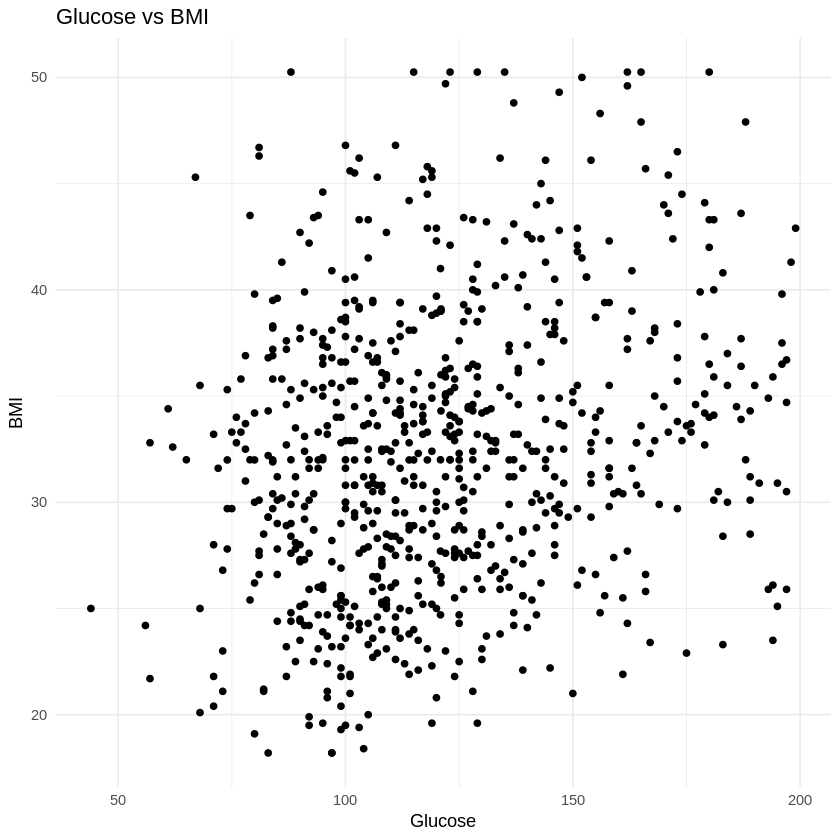

In [41]:
# select x axis to be the glucose and y axis to BMI
ggplot(data, aes(x = Glucose, y = BMI)) +
  geom_point() +
  labs(title = "Glucose vs BMI", x = "Glucose", y = "BMI") +
  theme_minimal()


A failed trial to find a trend in the data

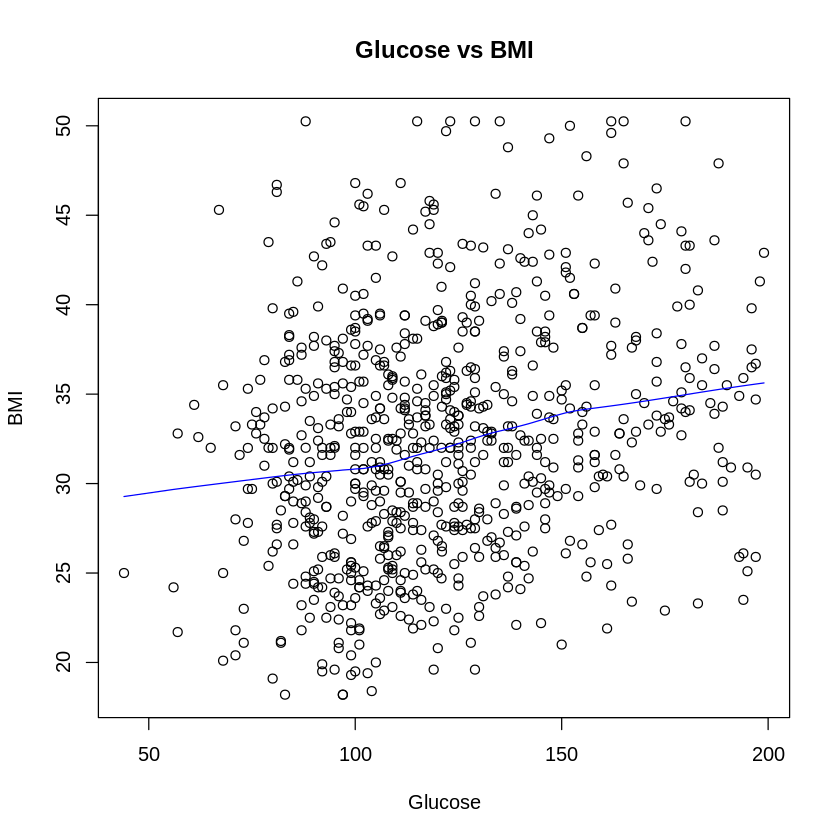

In [42]:
plot(data$Glucose, data$BMI, main="Glucose vs BMI", xlab="Glucose", ylab="BMI")
lines(lowess(data$Glucose, data$BMI), col="blue")


conclusion: **NO** The scatter plot shows no clear trend between high glucose levels and high BMI

# 3 Are patients with a higher number of pregnancies at greater risk of developing diabetes?
yes

I calculated the precentage of woman for each category(diabetes or no diabetes )to make the change in the both categories more clear in the plot  

In [43]:
data2<- group_by(data, Pregnancies, Outcome)
data2<- summarize(data2, Count_each_pregNum = n(), .groups = 'drop')
data2<- group_by(data2, Pregnancies)
data2 <-mutate(data2, percentage = Count_each_pregNum / sum(Count_each_pregNum) * 100)
data2

Pregnancies,Outcome,Count_each_pregNum,percentage
<int>,<int>,<int>,<dbl>
0,0,73,65.76577
0,1,38,34.23423
1,0,106,78.51852
1,1,29,21.48148
2,0,84,81.55340
2,1,19,18.44660
3,0,48,64.00000
3,1,27,36.00000
4,0,45,66.17647


I used stacked bar chart because  The chart allows for a clear comparison between women with diabetes (light blue) and those without diabetes (dark blue) within each pregnancy group.

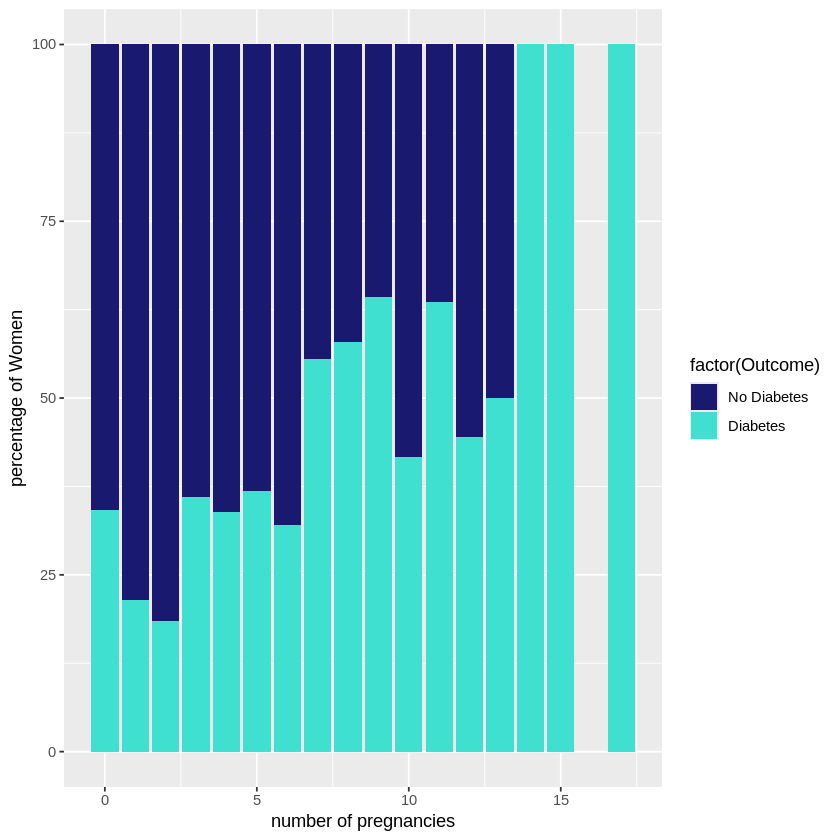

In [44]:
ggplot(data2, aes(x = Pregnancies, y = percentage, fill = factor(Outcome))) +
  geom_bar(position = "stack", stat = "identity") +
  labs(
    x = "number of pregnancies",
    y = "percentage of Women",

  ) +
  scale_fill_manual(
    values = c("midnightblue", "turquoise"),
    labels = c("No Diabetes", "Diabetes")
  ) +
  theme_gray()

conclusion: **yes** As the number of pregnancies increases, the proportion of women with diabetes increases, while the proportion of woman with no diabetes decreases
so women with a higher number of pregnancies have a greater risk of developing diabetes

# 4-Are older patients more likely to have higher insulin concentrations and blood glucose levels?

older patients have higher blood sugar but less insulin concentration than younger patients

STEPS:

1-Add standard ranges for age, insulin, and glucose.

2-Extract specific columns from the data and filter the subset based on the defined standards.

3-Calculate the mean glucose and insulin levels for older patients.

4-Calculate the mean glucose and insulin levels for younger patients.

In [45]:
age <- 60

old <- subset(data, Age >= age)
younge <- subset(data, Age < age)

head(old)
head(younge)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
31,5,109,75,26.00000,79.79948,36.0,0.546,60,0
94,4,134,72,20.53646,79.79948,23.8,0.277,60,1
116,4,146,92,20.53646,79.79948,31.2,0.539,61,1
124,5,132,80,20.53646,79.79948,26.8,0.186,69,0
130,0,105,84,20.53646,79.79948,27.9,0.741,62,1
149,5,147,78,20.53646,79.79948,33.7,0.218,65,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00000,79.79948,33.6,0.627,50,1
2,1,85,66,29.00000,79.79948,26.6,0.351,31,0
3,8,183,64,20.53646,79.79948,23.3,0.672,32,1
4,1,89,66,23.00000,94.00000,28.1,0.167,21,0
5,0,137,40,35.00000,168.00000,43.1,2.288,33,1
6,5,116,74,20.53646,79.79948,25.6,0.201,30,0


In [46]:
glucose <- 130

high_glocose <- subset(data, Glucose >= glucose)
low_glocose <- subset(data, Glucose < glucose)

head(high_glocose)
head(low_glocose)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00000,79.79948,33.6,0.627,50,1
3,8,183,64,20.53646,79.79948,23.3,0.672,32,1
5,0,137,40,35.00000,168.00000,43.1,2.288,33,1
9,2,197,70,45.00000,198.42578,30.5,0.158,53,1
12,10,168,74,20.53646,79.79948,38.0,0.537,34,1
13,10,139,80,20.53646,79.79948,27.1,1.441,57,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,1,85,66.00000,29.00000,79.79948,26.60000,0.351,31,0
4,1,89,66.00000,23.00000,94.00000,28.10000,0.167,21,0
6,5,116,74.00000,20.53646,79.79948,25.60000,0.201,30,0
7,3,78,50.00000,32.00000,88.00000,31.00000,0.248,26,1
8,10,115,69.10547,20.53646,79.79948,35.30000,0.134,29,0
10,8,125,96.00000,20.53646,79.79948,31.99258,0.232,54,1


In [47]:
insulin <- 15

high_insulin <- subset(data, Insulin >= insulin)
low_insulin <- subset(data, Insulin < insulin)

head(high_insulin)
head(low_insulin)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35.00000,79.79948,33.6,0.627,50,1
2,1,85,66,29.00000,79.79948,26.6,0.351,31,0
3,8,183,64,20.53646,79.79948,23.3,0.672,32,1
4,1,89,66,23.00000,94.00000,28.1,0.167,21,0
5,0,137,40,35.00000,168.00000,43.1,2.288,33,1
6,5,116,74,20.53646,79.79948,25.6,0.201,30,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
446,0,180,78,49.19531,14,50.25,2.42,25,1


In [48]:
old_insulin_mean <- mean(old$Insulin)
younger_insulin_mean <- mean(younge$Insulin)

old_glucose_mean <- mean(old$Glucose)
younger_glucose_mean <- mean(younge$Glucose)

cat("Older patients insulin:", old_insulin_mean, "\n")
cat("Younger patients mean insulin:", younger_insulin_mean, "\n")

cat("Older patients mean glucose:", old_glucose_mean, "\n")
cat("Younger patients mean glucose:", younger_glucose_mean, "\n")


Older patients insulin: 93.16992 
Younger patients mean insulin: 104.362 
Older patients mean glucose: 138.25 
Younger patients mean glucose: 120.9612 


Loading required package: scatterplot3d

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘scatterplot3d’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



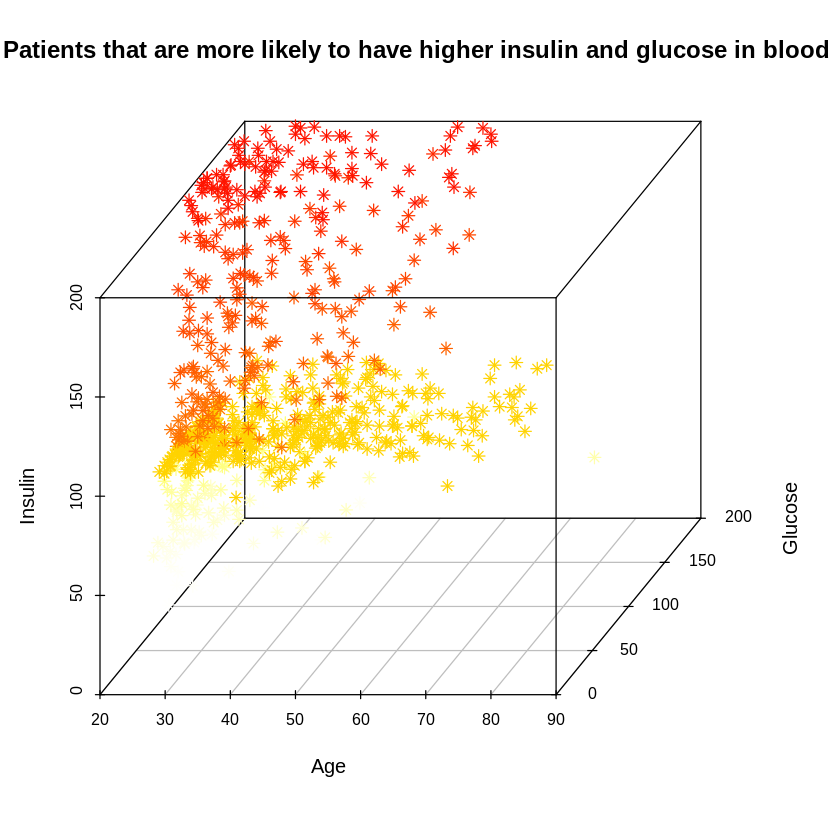

In [49]:
if (!require("scatterplot3d")) install.packages("scatterplot3d")

library(scatterplot3d)


scatterplot3d(
  x = data$Age,
  y = data$Glucose,
  z = data$Insulin,
  color = heat.colors(length(data$Insulin))[rank(-data$Insulin)], # Color by Insulin level
  pch = 8, #  shape of insulin
  xlab = "Age",
  ylab = "Glucose",
  zlab = "Insulin",
  main = "Patients that are more likely to have higher insulin and glucose in blood ",
)

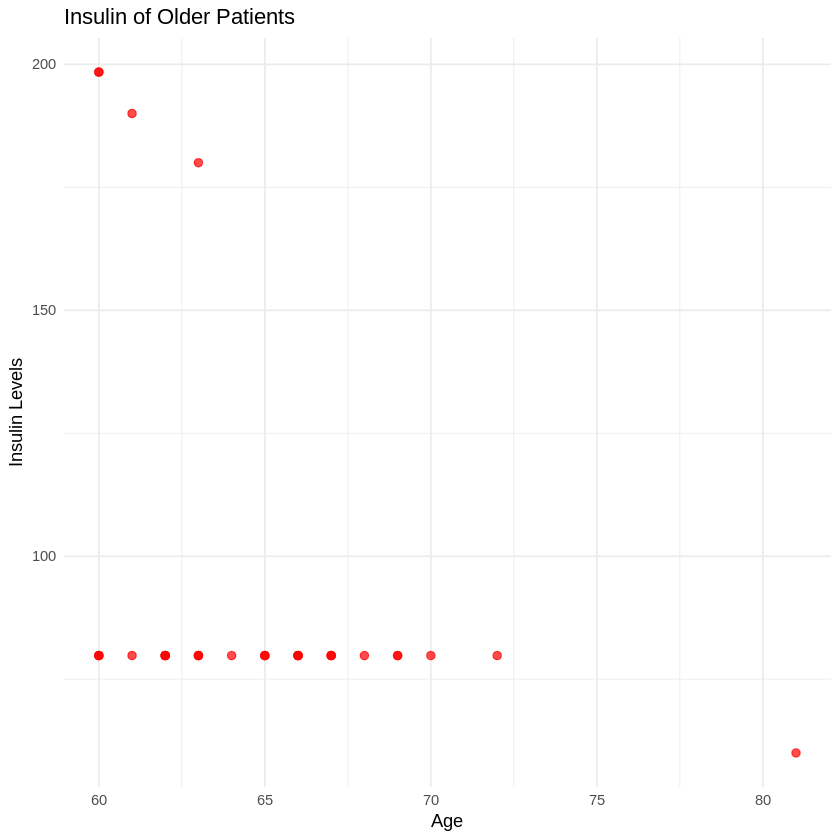

In [50]:

ggplot(old, aes(x = Age, y = Insulin)) +
  geom_point(size = 2, color = "red", alpha = 0.7) +
  labs(x = "Age", y = "Insulin Levels", title = "Insulin of Older Patients") +
  theme_minimal()


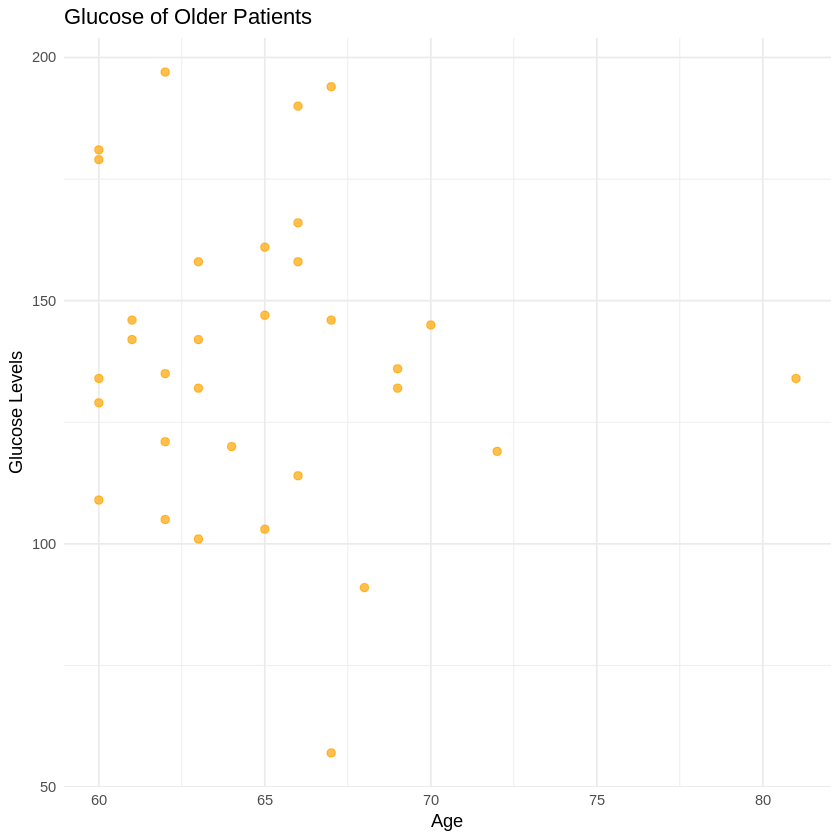

In [51]:

ggplot(old, aes(x = Age, y = Glucose)) +
  geom_point(size = 2, color = "orange", alpha = 0.7) +
  labs(x = "Age", y = "Glucose Levels", title = "Glucose of Older Patients") +
  theme_minimal()


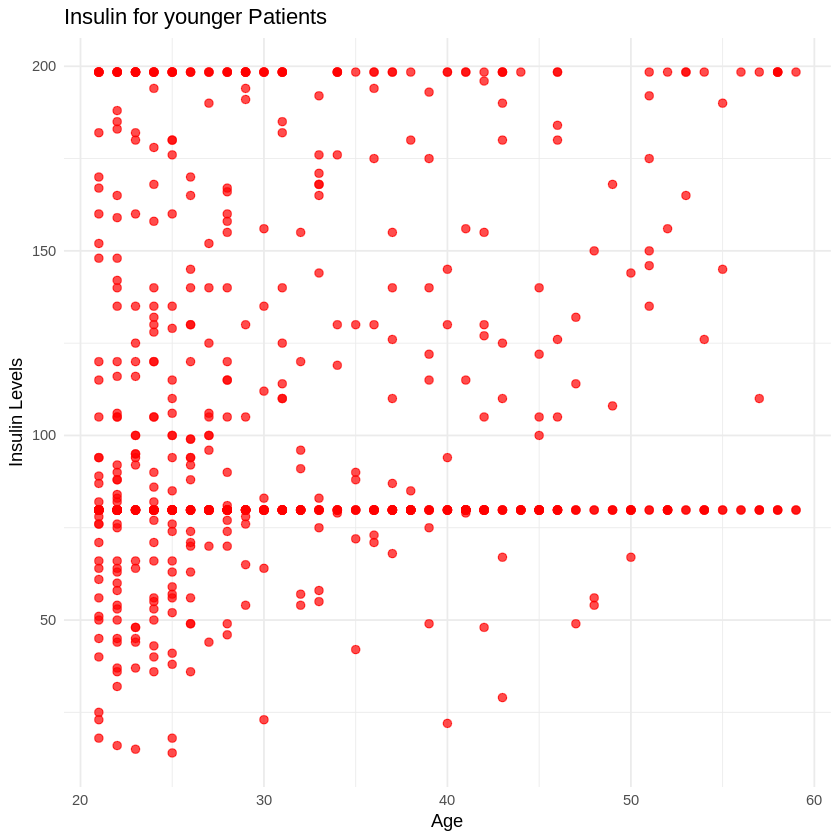

In [52]:
ggplot(younge, aes(x = Age, y = Insulin)) +
  geom_point(size = 2, color = "red", alpha = 0.7) +
  labs(x = "Age", y = "Insulin Levels", title = "Insulin for younger Patients") +
  theme_minimal()




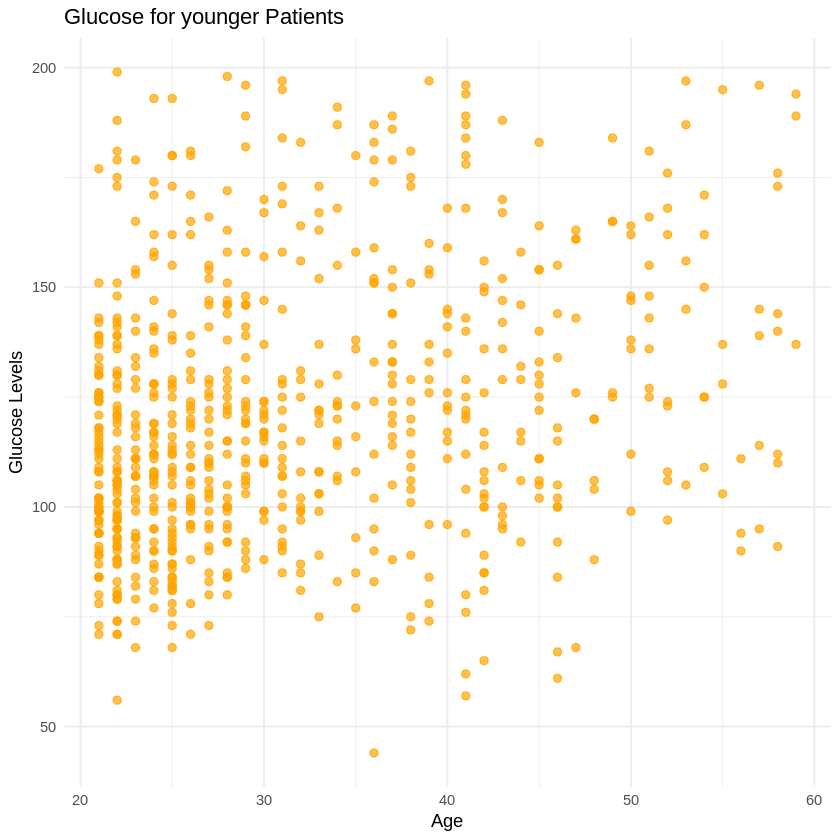

In [53]:
ggplot(younge, aes(x = Age, y = Glucose)) +
  geom_point(size = 2, color = "orange", alpha = 0.7) +
  labs(x = "Age", y = "Glucose Levels", title = "Glucose for younger Patients") +
  theme_minimal()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


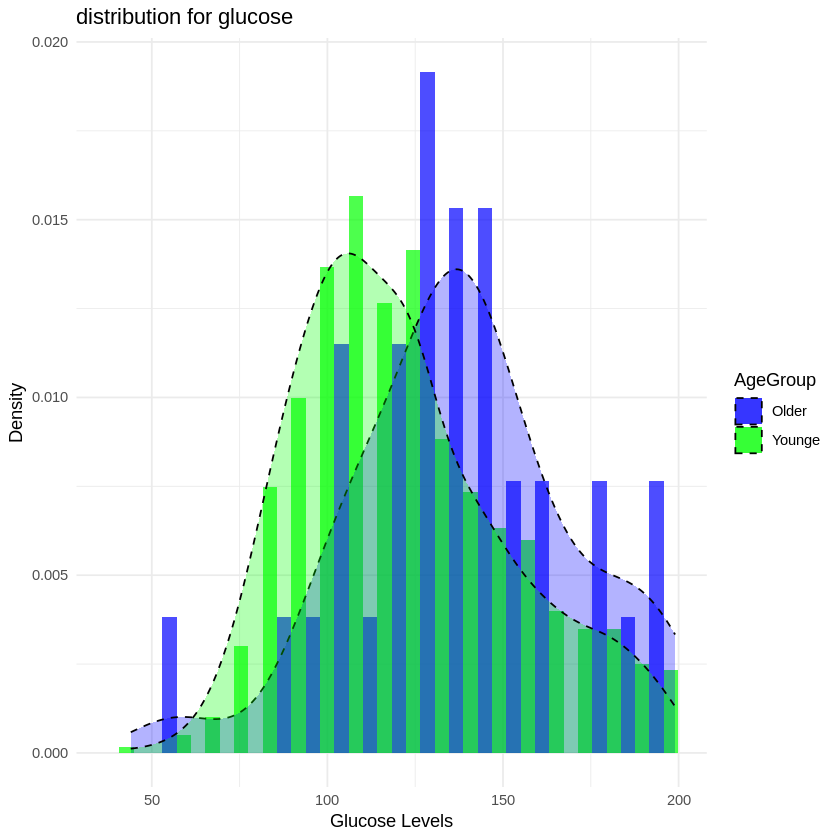

In [54]:

library(MASS)

# older and younger patients with glucose
combined_glucose <- rbind(
  data.frame(AgeGroup = "Older", Glucose = old$Glucose),
  data.frame(AgeGroup = "Younge", Glucose = younge$Glucose)
)



ggplot(combined_glucose, aes(x = Glucose, fill = AgeGroup)) +
  geom_histogram(aes(y = ..density..), bins = 20, position = "dodge", alpha = 0.7) +
  geom_density(alpha = 0.3, linetype = "dashed") +
  labs(x = "Glucose Levels",
 y = "Density",
 title = "distribution for glucose ") +
  scale_fill_manual(values = c("blue", "green")) +
  theme_minimal()

fit_glucose_old <- fitdistr(old$Glucose, "normal")
fit_glucose_younge <- fitdistr(younge$Glucose, "normal")





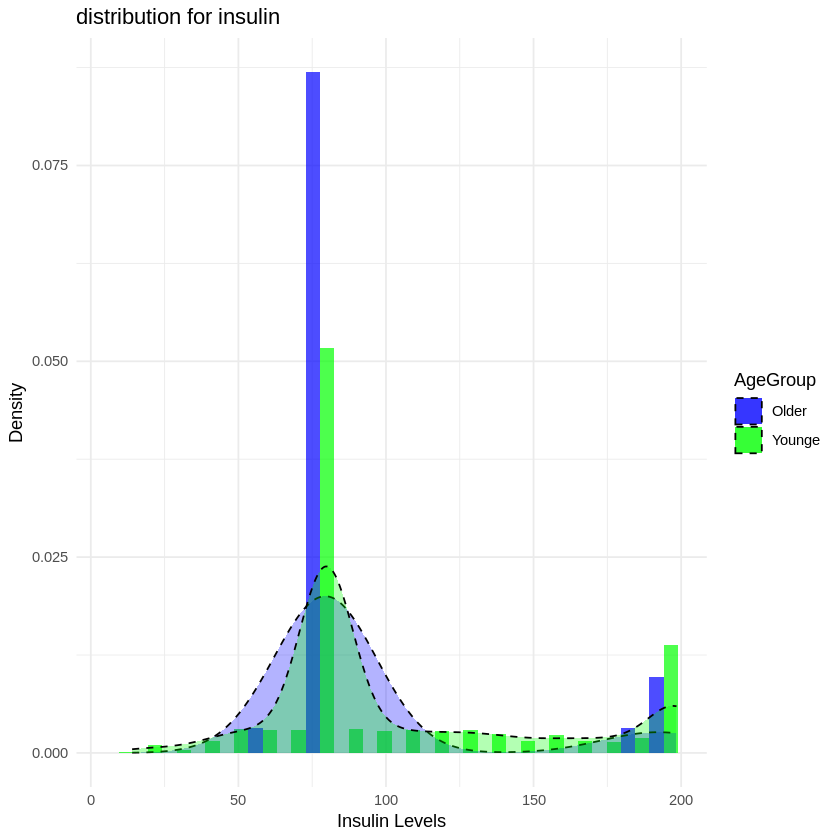

In [55]:
# older and younger patients with insulin
combined_insulin <- rbind(
  data.frame(AgeGroup = "Older", Insulin = old$Insulin),
  data.frame(AgeGroup = "Younge", Insulin = younge$Insulin)
)

ggplot(combined_insulin, aes(x = Insulin, fill = AgeGroup)) +
  geom_histogram(aes(y = ..density..), bins = 20, position = "dodge", alpha = 0.7) +
  geom_density(alpha = 0.3, linetype = "dashed") +
  labs(x = "Insulin Levels",
 y = "Density",
 title = "distribution for insulin ") +
  scale_fill_manual(values = c("blue", "green")) +
  theme_minimal()


fit_insulin_older <- fitdistr(old$Insulin, "normal")
fit_insulin_younger <- fitdistr(younge$Insulin, "normal")



Conclusion: **yes** Older patients tend to have slightly higher glucose levels than younger ones, but they have lower insulin levels.

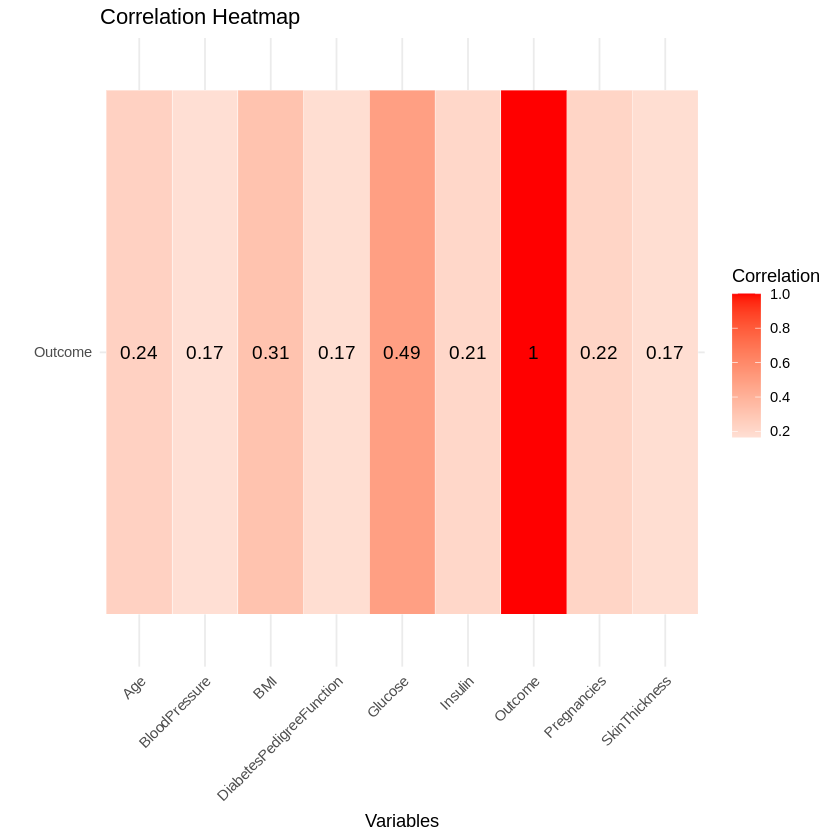

In [56]:
# Select only numeric columns
numeric_columns <- sapply(data, is.numeric)
numeric_data <- data[, numeric_columns]

# Calculate correlations with Outcome
correlation_results <- sapply(numeric_data, function(col) {
  cor(data$Outcome, col, method = "pearson", use = "complete.obs")
})

# Convert to a data frame for visualization
correlation_df <- data.frame(
  Variable = names(correlation_results),
  Correlation = correlation_results
)

# Install and load ggplot2 if not already installed
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Plot heatmap with correlation values
ggplot(correlation_df, aes(x = Variable, y = "Outcome", fill = Correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Correlation, 2)), color = "black", size = 4) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "Variables", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# 5.Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


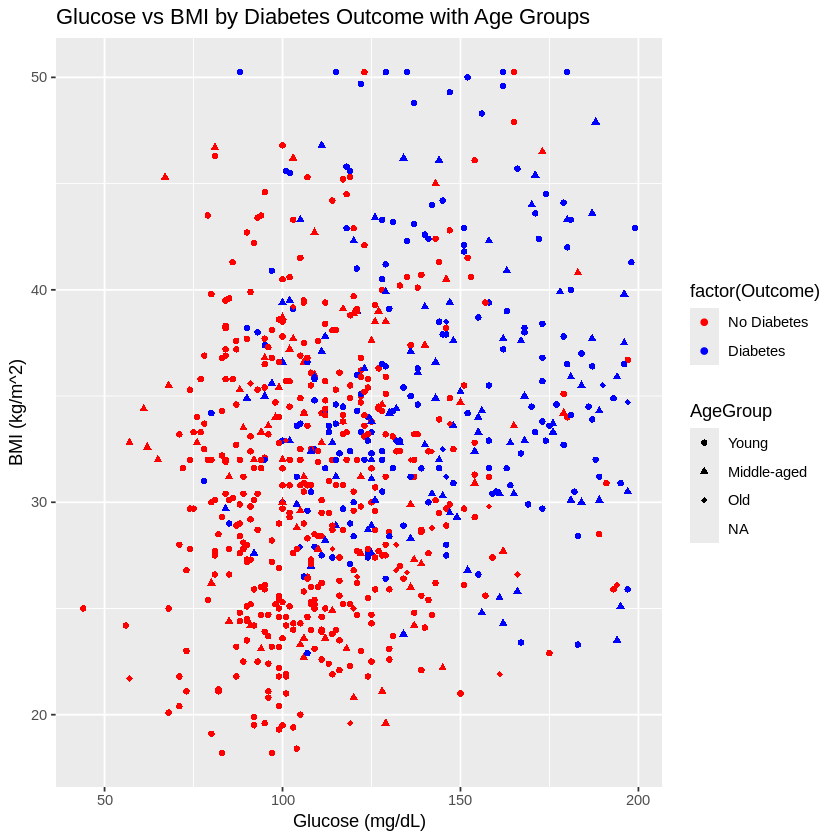

In [57]:
# the qustions means the things that affect to make person more exposed to diabetes
data$AgeGroup <- cut(data$Age, breaks = c(20, 40, 60, 80), labels = c("Young", "Middle-aged", "Old"))


ggplot(data = data, aes(x = Glucose, y = BMI, col = factor(Outcome), shape = AgeGroup)) +
  geom_point() +
  labs(title = "Glucose vs BMI by Diabetes Outcome with Age Groups",
       x = "Glucose (mg/dL)",
       y = "BMI (kg/m^2)") +
  scale_color_manual(values = c("red", "blue"), labels = c("No Diabetes", "Diabetes")) +
  scale_shape_manual(values = c(16, 17, 18))

conclusion
Glucose Levels as a Key Indicator:
glucose levels are strongly associated with diabetes.

BMI Influence:
the visualization indicates that higher BMI might be a contributing risk factor for diabetes.

Age Group Impact:

Middle-aged and older individuals are more likely to have diabetes

# SECTION 2.2

# 1 Do high glucose levels with high BMI indicate a higher probability of being diabetic?

I used the box plot because it cleary shows the difference in mean in each category

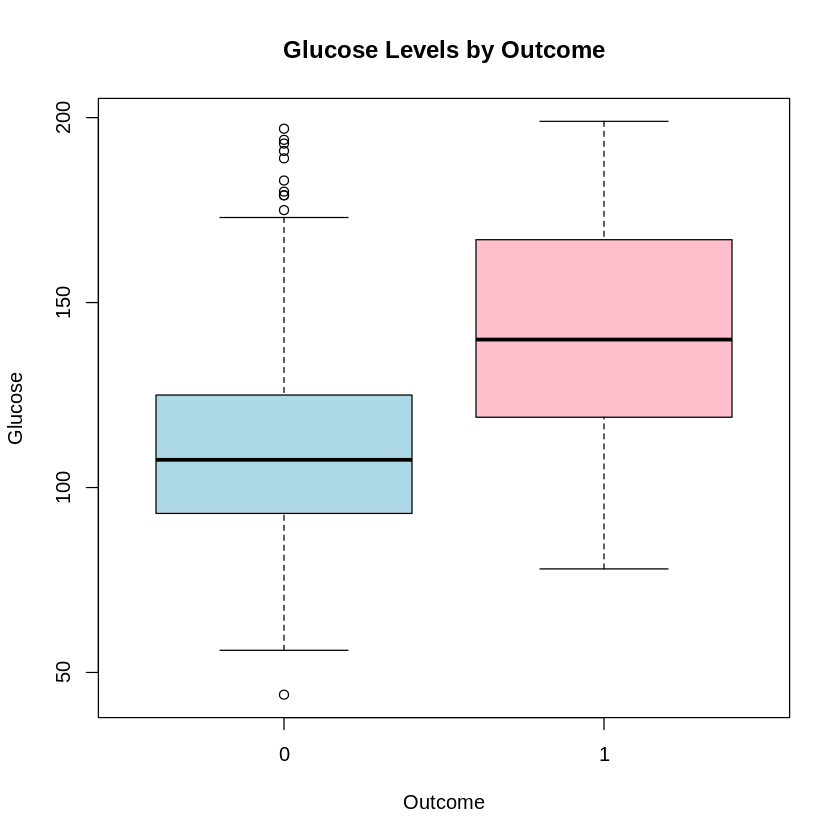

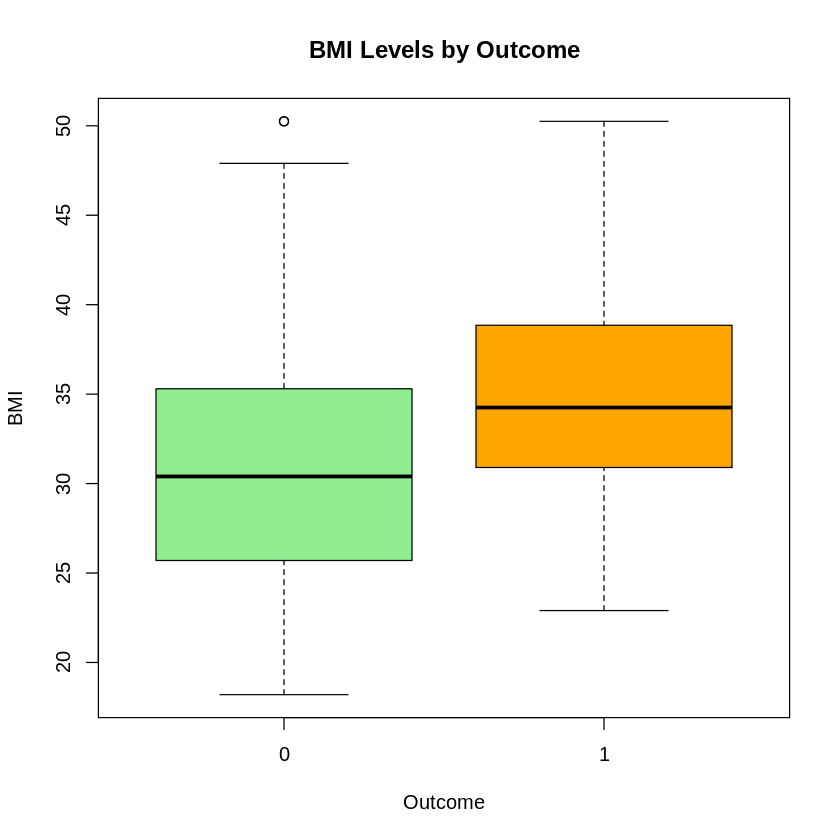

In [58]:
# YES

# difference in mean in glucose
boxplot(Glucose ~ Outcome, data = data,
        main = "Glucose Levels by Outcome",
        xlab = "Outcome", ylab = "Glucose",
        col = c("lightblue", "pink"))
# difference in mean in BMI
boxplot(BMI ~ Outcome, data = data,
        main = "BMI Levels by Outcome",
        xlab = "Outcome", ylab = "BMI",
        col = c("lightgreen", "orange"))


The denisty graph is appropiate because it shows where the majority lies in

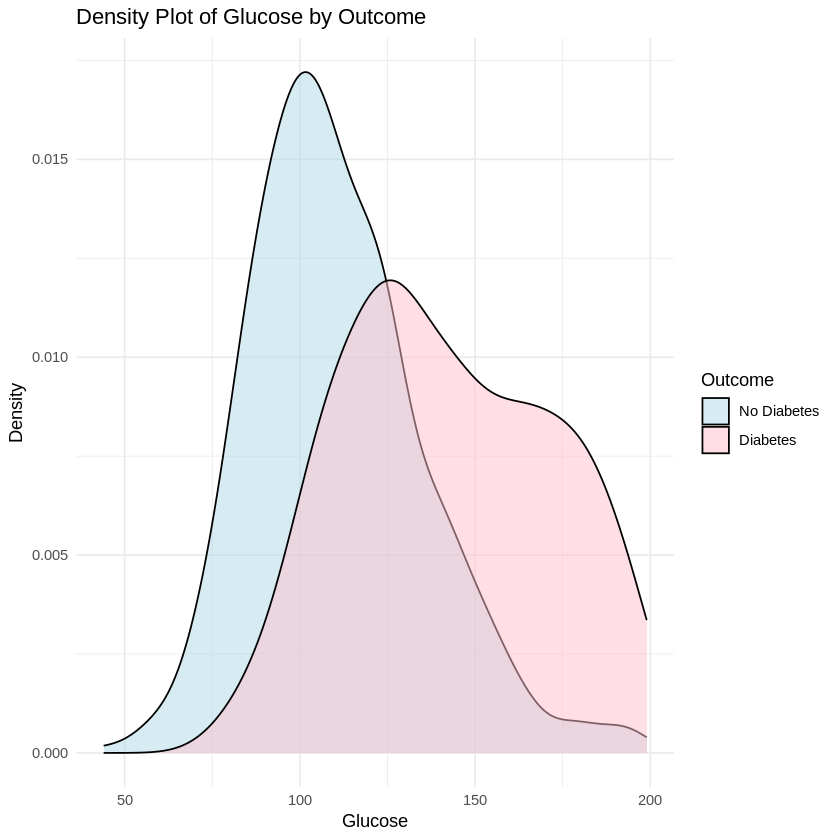

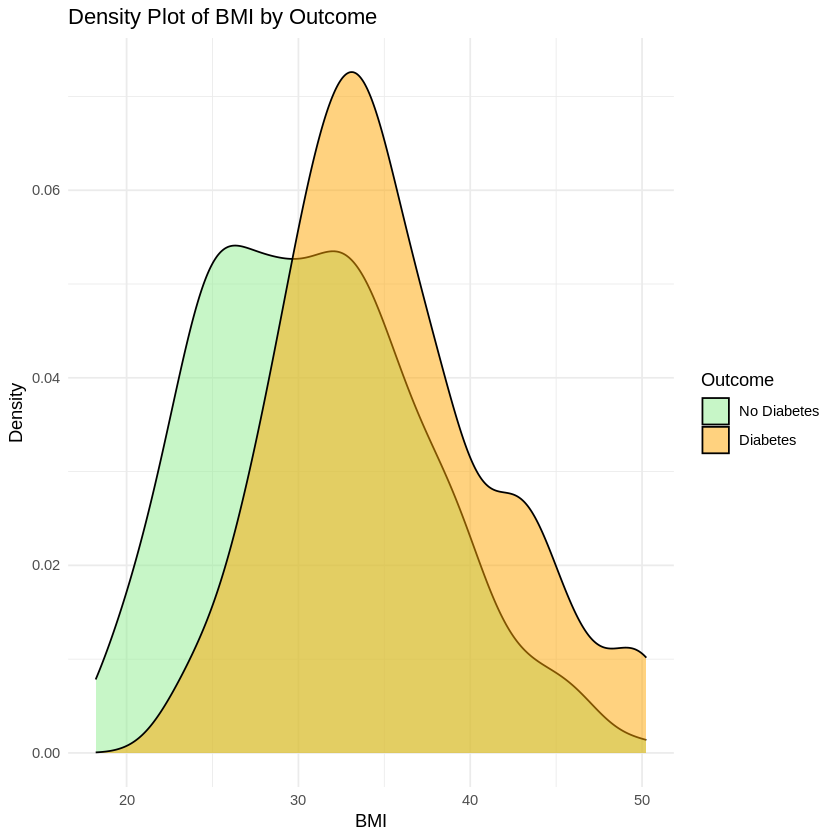

In [59]:
library(ggplot2)

ggplot(data, aes(x = Glucose, fill = as.factor(Outcome))) +
  geom_density(alpha = 0.5) +
  scale_fill_manual(values = c("lightblue", "pink"), name = "Outcome", labels = c("No Diabetes", "Diabetes")) +
  labs(title = "Density Plot of Glucose by Outcome", x = "Glucose", y = "Density") +
  theme_minimal()

ggplot(data, aes(x = BMI, fill = as.factor(Outcome))) +
  geom_density(alpha = 0.5) +
  scale_fill_manual(values = c("lightgreen", "orange"), name = "Outcome", labels = c("No Diabetes", "Diabetes")) +
  labs(title = "Density Plot of BMI by Outcome", x = "BMI", y = "Density") +
  theme_minimal()


conclusion: **yes** as shown in the visualizations people who has high glucose levels and high BMI are more likely to have diabetes

# 2 Do young samples with high BMI more likely to be diagnosed as diabetic?



1.   Filter patients under 25 into data_under_25.
2.   Create a density plot of BMI by Outcome using ggplot and geom_density().
3.   Customize colors, labels, and theme.



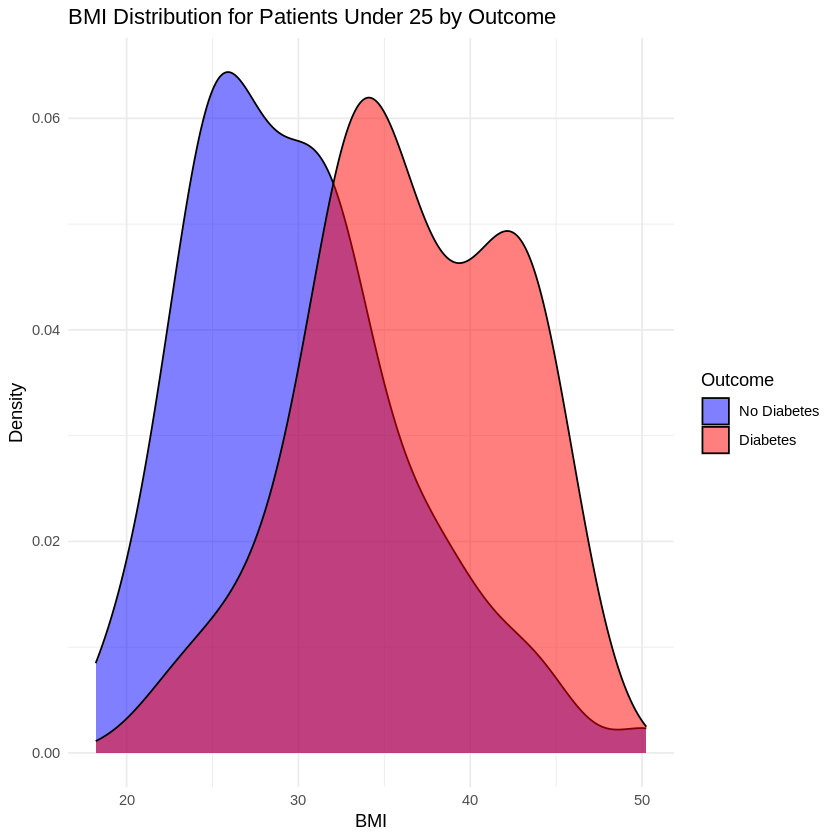

In [60]:
# YES
data_under_25 <- data[data$Age < 25, ]


ggplot(data_under_25, aes(x = BMI, fill = as.factor(Outcome))) +
  geom_density(alpha = 0.5) +
  scale_fill_manual(values = c("blue", "red"),
                    name = "Outcome",
                    labels = c("No Diabetes", "Diabetes")) +
  labs(title = "BMI Distribution for Patients Under 25 by Outcome",
       x = "BMI",
       y = "Density") +
  theme_minimal()



non diabetes people :
The BMI distribution peaks at  around 25 (lower BMI values)

Diabetes Group :
The BMI distribution peaks at around 34

conclusion: **yes** higher BMI is associated with a higher likelihood of diabetes for young people

# 3 Do insulin levels vary by BMI categories?

1. Categorize BMI.
2. Calculate mean insulin by BMI category.
3. Plot a bar chart with custom colors and labels.

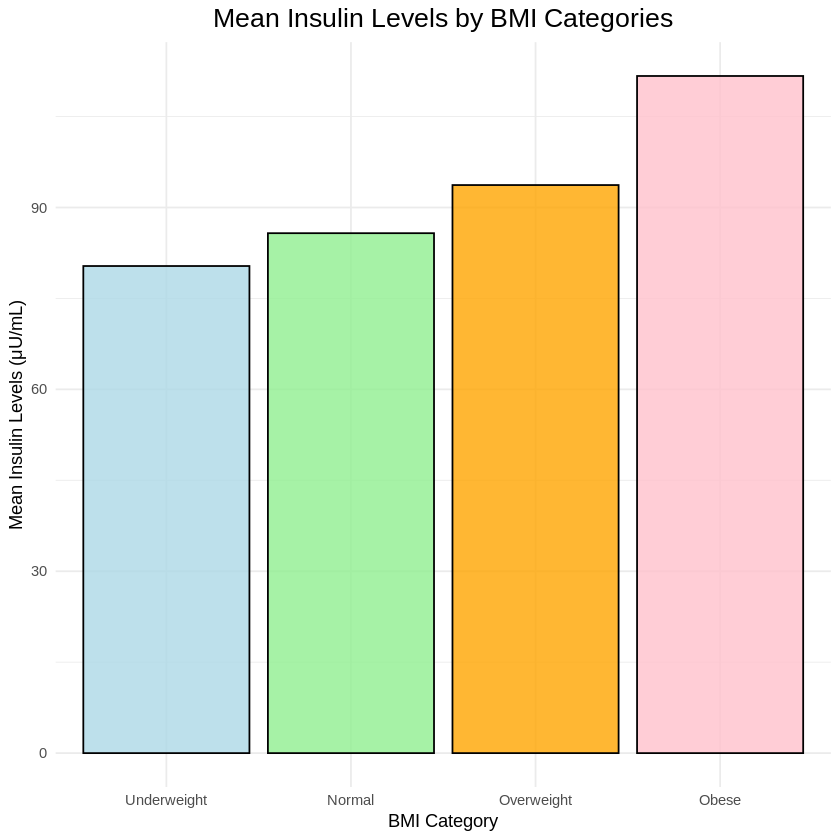

In [61]:
#yess




# creating BMI categories(Underweight,Normal,Overweight,Obese)
data <- data %>%
  mutate(BMI_Category = factor(case_when(
    BMI < 18.5 ~ "Underweight",
    BMI >= 18.5 & BMI < 25 ~ "Normal",
    BMI >= 25 & BMI < 30 ~ "Overweight",
    BMI >= 30 ~ "Obese"
  ), levels = c("Underweight", "Normal", "Overweight", "Obese")))

# get mean insulin for each BMI category
mean_insulin <- data %>%
  group_by(BMI_Category) %>%
  summarise(Mean_Insulin = mean(Insulin, na.rm = TRUE), .groups = "drop")

#  bar chart with mean insulin levels to each BMI category
ggplot(mean_insulin, aes(x = BMI_Category, y = Mean_Insulin, fill = BMI_Category)) +
  geom_bar(stat = "identity", color = "black", alpha = 0.8) +
  scale_fill_manual(values = c("lightblue", "lightgreen", "orange", "pink")) +
  labs(
    title = "Mean Insulin Levels by BMI Categories",
    x = "BMI Category",
    y = "Mean Insulin Levels (μU/mL)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.position = "none"
  )


conclusion: **yes** there is an direct relationship BMI categories and mean insulin levels
as people in higher BMI categories has higher mean insulin levels compared to those in lower BMI categories

# 4 Does age affect diabetes?

yes , age is an important factor that affect diabetes

In [62]:
data3<- group_by(data, Age, Outcome)
data3<- summarize(data3, Count_each_pregNum = n(), .groups = 'drop')
data3<- group_by(data3, Age)
data3 <-mutate(data3, percentage = Count_each_pregNum / sum(Count_each_pregNum) * 100)
data3

Age,Outcome,Count_each_pregNum,percentage
<int>,<int>,<int>,<dbl>
21,0,58,92.063492
21,1,5,7.936508
22,0,61,84.722222
22,1,11,15.277778
23,0,31,81.578947
23,1,7,18.421053
24,0,38,82.608696
24,1,8,17.391304
25,0,34,70.833333


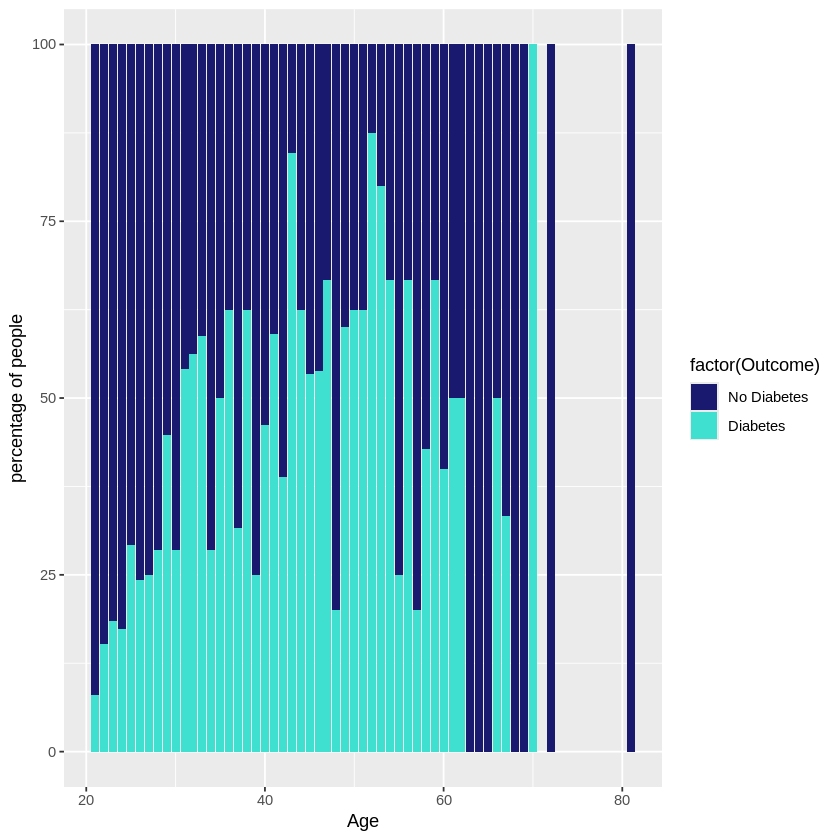

In [63]:
ggplot(data3, aes(x =Age, y = percentage, fill = factor(Outcome))) +
  geom_bar(position = "stack", stat = "identity") +
  labs(
    x = "Age",
    y = "percentage of people",

  ) +
  scale_fill_manual(
    values =c("midnightblue", "turquoise"),
    labels = c("No Diabetes", "Diabetes")
  ) +
  theme_gray()

conclusion: **yes** older group seems to have higher percentage of diabetes than the younger group

# 5 does skin thickness affect diabetes?

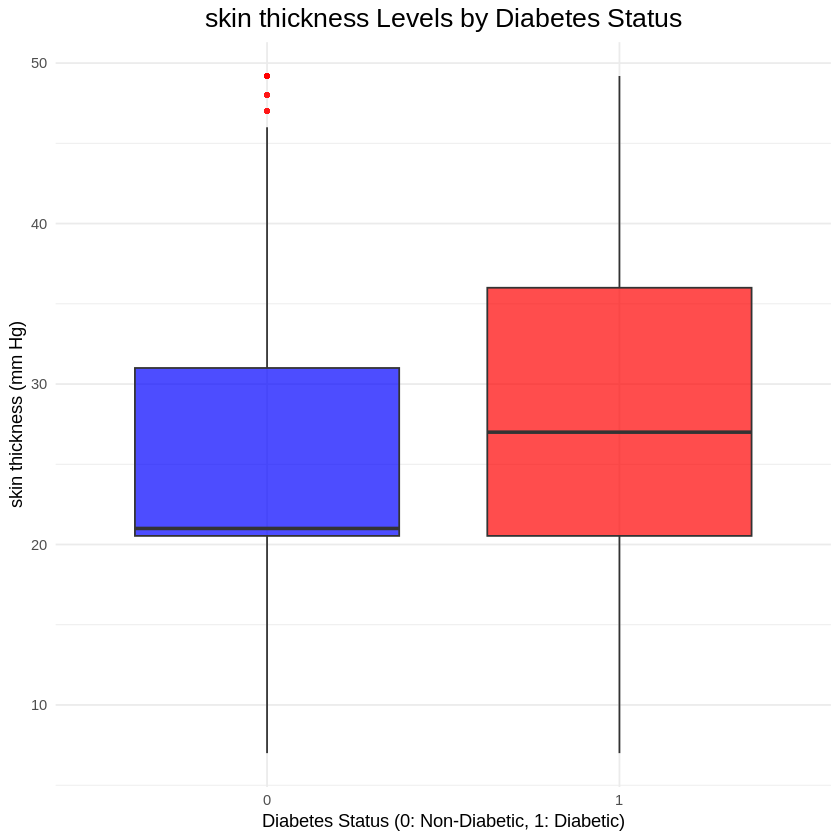

In [64]:
# Load necessary libraries
library(ggplot2)

# Boxplot to compare skin thickness levels by diabetes status
ggplot(data, aes(x = factor(Outcome), y = SkinThickness, fill = factor(Outcome))) +
  geom_boxplot(outlier.color = "red", outlier.shape = 16, alpha = 0.7) +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(
    title = "skin thickness Levels by Diabetes Status",
    x = "Diabetes Status (0: Non-Diabetic, 1: Diabetic)",
    y = "skin thickness (mm Hg)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.position = "none"
  )


conclusion : **yes** high skin thickness is more likely related with diabetes

# Part 3

# 3.1

**1- Stating the test**

We will use **t-test of two samples**

Reasons:
*   Comparison is between **Diabetic** and **Non Diabetic** which are Two independent groups
*   Population standard deviation(σ) is unkown so the sample standard deviation(S) is used
*   n≥30 (Central Limit Theorem).


 **2- stating the hypotheses**

μ1 is the mean of glucose in diabetic

μ2 is the mean of glucose in non diabetic

$$
H_0: \mu 1 = \mu 2 \quad \text{vs.} \quad H_a: \mu 1 ≠ \mu 2
$$

**3- Conduct the test and report the result.**

In [65]:
diabetic = data$Glucose[data$Outcome == 1]
no_dia= data$Glucose[data$Outcome == 0]
#  means
mean1 <- mean(diabetic)
mean2 <- mean(no_dia)

# sd
sd1 <- sd(diabetic)
sd2 <- sd(no_dia)

# Calculate sample sizes
n1 <- length(diabetic)
n2 <- length(no_dia)

alpha <- 0.05

cat(" the mean of glugose to people who have diabetes:", mean1, "\n")
cat("the mean of glugose to people who don't have diabetes:", mean2, "\n")
cat("Standard Deviation of glugose to people who have diabetes", sd1, "\n")
cat("Standard Deviation of glugose to people who don't have diabetes", sd2, "\n")


 the mean of glugose to people who have diabetes: 142.1597 
the mean of glugose to people who don't have diabetes: 110.7054 
Standard Deviation of glugose to people who have diabetes 29.54594 
Standard Deviation of glugose to people who don't have diabetes 24.71502 


Conducting the test

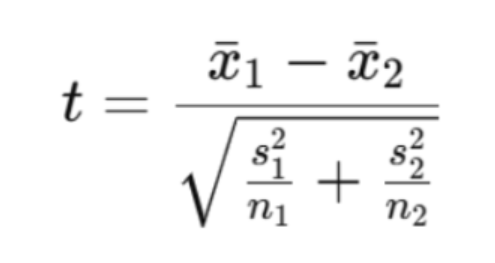

In [66]:
t_statistic <- (mean1 - mean2) / sqrt((sd1^2 / n1) + (sd2^2 / n2))

cat("t-statistic (t):", t_statistic)

t-statistic (t): 14.86244

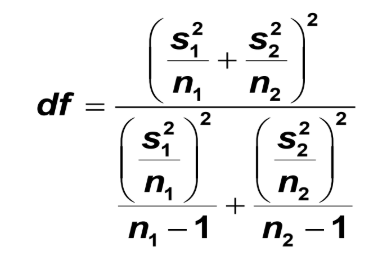

In [67]:
# since the samples has unequal variances , therefore degree of freedom=
df <- ((sd1^2 / n1 + sd2^2 / n2)^2) / (((sd1^2 / n1)^2 / (n1 - 1)) + ((sd2^2 / n2)^2 / (n2 - 1)))
cat("Degrees of Freedom (df):", df)


Degrees of Freedom (df): 469.498

In [68]:
# p-value using pt function for the t-distribution
# Two-tailed
p_value <- 2 * (1 - pt(abs(t_statistic), df))

cat("p-value:", p_value, "\n")



p-value: 0 


In [69]:
# conclusion
if (p_value < alpha) {
  cat("conclusion: Reject the null hypothesis (H0)\n")
} else {
  cat("conclusion: Fail to reject the null hypothesis (H0) \n")
}

conclusion: Reject the null hypothesis (H0)


In [70]:
# Ourfinal results

cat(" final results:\n   mean1:", mean1, "\n")
cat("mean2 :", mean2, "\n")
cat("Standard_Deviation1: ", sd1, "\n")
cat("Standard_Deviation2: ", sd2, "\n")
cat("t-statistic:", t_statistic, "\n")
cat("Degrees of Freedom", df, "\n")
cat("p-value:", p_value, "\n")
if (p_value < alpha) {
  cat("conclusion: Reject the null hypothesis (H0)\n")
} else {
  cat("conclusion: Fail to reject the null hypothesis (H0) \n")
}

 final results:
   mean1: 142.1597 
mean2 : 110.7054 
Standard_Deviation1:  29.54594 
Standard_Deviation2:  24.71502 
t-statistic: 14.86244 
Degrees of Freedom 469.498 
p-value: 0 
conclusion: Reject the null hypothesis (H0)


In [71]:
# built-in function to check our results
t_test_result <- t.test(diabetic, no_dia, alternative = "two.sided", conf.level = 0.95)

t_test_result



	Welch Two Sample t-test

data:  diabetic and no_dia
t = 14.862, df = 469.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 27.29558 35.61301
sample estimates:
mean of x mean of y 
 142.1597  110.7054 


# 3.2

***Our claim: non-diabetic people have a higher insulin level than diabetic people.***

**1- Stating the test**

We will use **t-test of two samples**

Reasons:
*   Comparison is between **Diabetic** and **Non Diabetic** which are Two independent groups
*   Population standard deviation(σ) is unkown so the sample standard deviation(S) is used
*   n≥30 (Central Limit Theorem).




 **2- stating the hypotheses**

μ1 is the mean of insulin to people who have diabetes

μ2 is the mean of insulin to people who don't have diabetes


$$
H_0: \mu 1  ≥  \mu 2 \quad \text{vs.} \quad H_a: \mu 1 < \mu 2
$$

In [72]:
# diabetic:insulin to people who have diabetes
# no_dia: insulin to people who don't have diabetes
diabetic = data$Insulin[data$Outcome == 1]
no_dia= data$Insulin[data$Outcome == 0]
#means
mean1 <- mean(diabetic)
mean2 <- mean(no_dia)

#standard deviations
sd1 <- sd(diabetic)
sd2 <- sd(no_dia)

#sample sizes
n1 <- length(diabetic)
n2 <- length(no_dia)

alpha <- 0.05

cat(" the mean of insulin to people who have diabetes:", mean1, "\n")
cat("the mean of insulin to people who don't have diabetes:", mean2, "\n")
cat("Standard Deviation of insulin to people who have diabetes", sd1, "\n")
cat("Standard Deviation of insulin to people who don't have diabetes", sd2, "\n")

t_statistic<- (mean1- mean2) / sqrt((sd1^2 / n1) + (sd2^2 / n2))


# since the samples has unequal variances , therefore degree of freedom=
df <- ((sd1^2 /n1 + sd2^2 / n2)^2) / (((sd1^2 / n1)^2 /(n1 - 1)) + ((sd2^2 / n2)^2 /(n2 - 1)))

cat("t-statistic (t):", t_statistic, "\n")
cat("Degrees of Freedom (df):", df, "\n")



# p-value using pt function for the t-distribution
# one tailed less than
p_value <- pt(t_statistic, df, lower.tail = TRUE)

cat("p-value:", p_value, "\n")

# conclusion
if (p_value < alpha) {
  cat("conclusion: Reject the null hypothesis (H0)\n")
} else {
  cat("conclusion: Fail to reject the null hypothesis (H0) \n")
}

 the mean of insulin to people who have diabetes: 117.2251 
the mean of insulin to people who don't have diabetes: 96.75112 
Standard Deviation of insulin to people who have diabetes 49.91544 
Standard Deviation of insulin to people who don't have diabetes 43.40319 
t-statistic (t): 5.664438 
Degrees of Freedom (df): 484.6704 
p-value: 1 
conclusion: Fail to reject the null hypothesis (H0) 


In [73]:
# built-in function to check our results
t_test_result <- t.test(diabetic, no_dia, alternative = "less", conf.level = 0.95)

print(t_test_result)



	Welch Two Sample t-test

data:  diabetic and no_dia
t = 5.6644, df = 484.67, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 26.43071
sample estimates:
mean of x mean of y 
117.22515  96.75112 



# Part 4

In [74]:
# Select a relevant column from the dataset (e.g., Glucose, BMI, or Age).
glucose_column <- data$Glucose
# head(glucose_column)

In [75]:
sample_size<-c()
Number_of_samples<-c()
Coverage_proportion <- c()
Average_width_of_interval <- c()

# 4.1 :   25 sample of size 15

In [76]:
set.seed(45)
#make list of samples but fixed number of samples
samples <- list()
for (i in 1:25) {
  # To prevent duplicates will make false replacement
  samples[[i]] <- sample(glucose_column, 15, replace = FALSE)
}
sample_size[1]<-15
Number_of_samples[1]<-25

# print(samples[[3]])

In [77]:
# first of all we need to take in the question it ask each sample is with size 15<30 so it will be t distribution
# secondly we need to think of steps
# third we need to put our conclusions and results in organized dataframe
# 1.empty lists to store mean values for each sample , lower confidence interval and upper confidence interval
# 2.loop on each of the 25 sample to calculate all statistics
# 3.calculate t_score
# 4.append in the lists
x_bars <- c()
ci_lower <- c()
ci_upper <- c()

ci_widths <- c()

for (i in 1:25) {
  current_sample <- samples[[i]]
  sample_mean <- mean(current_sample)
  sample_sd <- sd(current_sample)
  n <- length(current_sample)
  t_score <- qt(0.95, df = n - 1)

  x_bars[i] <- sample_mean
  ci_lower[i] <- sample_mean - t_score* (sample_sd / sqrt(n))
  ci_upper[i] <- sample_mean + t_score* (sample_sd / sqrt(n))
  ci_widths[i] <- ci_upper[i] - ci_lower[i]

}

data_frame <- data.frame(
  Sample = 1:25,
  mean = x_bars,
  lower_confidence_interval = ci_lower,
  upper_confidence_interval = ci_upper
)
data_frame

Sample,mean,lower_confidence_interval,upper_confidence_interval
<int>,<dbl>,<dbl>,<dbl>
1,127.9333,112.6418,143.2249
2,109.2000,101.9111,116.4889
3,129.1333,113.1545,145.1122
4,137.0000,121.7893,152.2107
5,124.2667,109.2520,139.2814
6,123.0667,107.2051,138.9282
7,127.9333,109.8873,145.9793
8,130.0667,117.5857,142.5476
9,121.2667,104.6848,137.8485


In [78]:
# From your output, determine the proportion of these 25 confidence intervals that contain the true population mean of the selected column (e.g., mean glucose or BMI).
# steps
# 1.calculate population mean
# 2.see who has pop mean who is not then sum how many has that has true value which is equal 1
# 3.determine the proportion of these 25 confidence intervals that contain the true population mean
population_mean <- mean(glucose_column)
equal_to_pop_mean <- (ci_lower <= population_mean ) & (ci_upper >=population_mean)
proportion <- sum(equal_to_pop_mean) / length(equal_to_pop_mean)
Coverage_proportion[1] <- proportion
cat("Proportion of Intervals Containing True Mean:", proportion, "\n")
# so we conclude that 92  is really  close to 95 this mean sampling and confidence interval calculations are working well

Proportion of Intervals Containing True Mean: 0.92 


In [79]:
# I need to know the average of the widths of CI
avg_width <- mean(ci_widths)
Average_width_of_interval[1] <- avg_width

# 4.2  :   25 samples of size 100

In [80]:
set.seed(45)
#make list of samples but fixed number of samples
samples2 <- list()
for (i in 1:25) {
  # To prevent duplicates will make false replacement
  samples2[[i]] <- sample(glucose_column, 100, replace = FALSE)
}
sample_size[2]<-100
Number_of_samples[2]<-25
# print(samples[[3]])

In [81]:
# first of all we need to take in the question it ask each sample is with size 100>30 so it will be z distribution
# secondly we need to think of steps
# third we need to put our conclusions and results in organized dataframe
# 1.empty lists to store mean values for each sample , lower confidence interval and upper confidence interval
# 2.loop on each of the 25 sample to calculate all statistics
# 3.calculate z_score
# 4.append in the lists
x_bars2 <- c()
ci_lower2 <- c()
ci_upper2 <- c()

ci_widths2 <- c()


for (i in 1:25) {
  current_sample2 <- samples2[[i]]
  sample_mean2 <- mean(current_sample2)
  sample_sd2 <- sd(current_sample2)
  n2 <- length(current_sample2)
  z_score2 <- qnorm(0.95)

  x_bars2[i] <- sample_mean2
  ci_lower2[i] <- sample_mean2 - z_score2* (sample_sd2 / sqrt(n2))
  ci_upper2[i] <- sample_mean2 + z_score2* (sample_sd2 / sqrt(n2))
  ci_widths2[i] <- ci_upper2[i] - ci_lower2[i]

}

data_frame2 <- data.frame(
  Sample = 1:25,
  mean = x_bars2,
  lower_confidence_interval = ci_lower2,
  upper_confidence_interval = ci_upper2
)
data_frame2

Sample,mean,lower_confidence_interval,upper_confidence_interval
<int>,<dbl>,<dbl>,<dbl>
1,127.1100,121.9402,132.2798
2,124.4700,119.1220,129.8180
3,121.0400,115.9413,126.1387
4,121.2879,115.7197,126.8561
5,126.2089,121.1371,131.2808
6,122.2800,117.2893,127.2707
7,122.2700,117.1036,127.4364
8,121.8189,116.7118,126.9261
9,120.4000,115.3876,125.4124


In [82]:
# From your output, determine the proportion of these 25 confidence intervals that contain the true population mean of the selected column (e.g., mean glucose or BMI).
# steps
# 1.calculate population mean
# 2.see who has pop mean who is not then sum how many has that has true value which is equal 1
# 3.determine the proportion of these 25 confidence intervals that contain the true population mean
population_mean2 <- mean(glucose_column)
equal_to_pop_mean2 <- (ci_lower2 <= population_mean2 ) & (ci_upper2 >=population_mean2)
proportion2 <- sum(equal_to_pop_mean2) / length(equal_to_pop_mean2)
Coverage_proportion[2] <- proportion2

cat("Proportion of Intervals Containing True Mean:", proportion2, "\n")
# so we conclude that 96  is closer to 95 this mean getting larger sampling and confidence interval calculations are working well

Proportion of Intervals Containing True Mean: 0.96 


In [83]:
# I need to know the average of the widths of CI
avg_width2 <- mean(ci_widths2)
Average_width_of_interval[2] <- avg_width2

# Additional section just for fair comparison : 25 sample of size 10

In [84]:
# trying 25 sample to make fair comparison
set.seed(45)
#make list of samples but fixed number of samples
samples3 <- list()
for (i in 1:25) {
  # To prevent duplicates will make false replacement
  samples3[[i]] <- sample(glucose_column, 10, replace = FALSE)
}
sample_size[3]<-10
Number_of_samples[3]<-25


In [85]:
# For each sample, compute the mean and determine the 95% confidence intervals.
x_bars3 <- c()
ci_lower3 <- c()
ci_upper3 <- c()

ci_widths3 <- c()


for (i in 1:25) {
  current_sample3 <- samples3[[i]]
  sample_mean3 <- mean(current_sample3)
  sample_sd3 <- sd(current_sample3)
  n3 <- length(current_sample3)
  t_score3 <- qt(0.95, df = n3 - 1)

  x_bars3[i] <- sample_mean3
  ci_lower3[i] <- sample_mean3 - t_score3* (sample_sd3 / sqrt(n3))
  ci_upper3[i] <- sample_mean3 + t_score3* (sample_sd3 / sqrt(n3))
    ci_widths3[i] <- ci_upper3[i] - ci_lower3[i]

}

data_frame3 <- data.frame(
  sample = 1:25,
  mean= x_bars3,
  lower_confidence_interval = ci_lower3,
  upper_confidence_interval = ci_upper3
)
data_frame3

sample,mean,lower_confidence_interval,upper_confidence_interval
<int>,<dbl>,<dbl>,<dbl>
1,120.5,107.47400,133.5260
2,124.8,101.08922,148.5108
3,105.1,96.00621,114.1938
4,127.8,108.47382,147.1262
5,151.2,131.21655,171.1835
6,126.1,110.27790,141.9221
7,126.8,106.25096,147.3490
8,115.3,97.66428,132.9357
9,126.9,106.38979,147.4102


In [86]:
population_mean3 <- mean(glucose_column)
equal_to_pop_mean3 <- (ci_lower3 <= population_mean3 ) & (ci_upper3 >=population_mean3)
proportion3 <- sum(equal_to_pop_mean3) / length(equal_to_pop_mean3)

Coverage_proportion[3] <-proportion3
cat("Proportion of Intervals Containing True Mean:", proportion3, "\n")

Proportion of Intervals Containing True Mean: 0.84 


In [87]:
# I need to know the average of the widths of CI
avg_width3 <- mean(ci_widths3)
Average_width_of_interval[3] <- avg_width3

# 4.3   : 20 sample of size 10

In [88]:
# Finally, generate 20 random samples, each with a sample size of 10, from the same selected column in the dataset.
set.seed(45)
#make list of samples but fixed number of samples
samples4 <- list()
for (i in 1:20) {
  # To prevent duplicates will make false replacement
  samples4[[i]] <- sample(glucose_column, 10, replace = FALSE)
}
sample_size[4]<-10
Number_of_samples[4]<-20

# print(samples2[[3]])

In [89]:
# For each sample, compute the mean and determine the 95% confidence intervals.
x_bars4 <- c()
ci_lower4 <- c()
ci_upper4 <- c()

ci_widths4 <- c()


for (i in 1:20) {
  current_sample4 <- samples4[[i]]
  sample_mean4 <- mean(current_sample4)
  sample_sd4 <- sd(current_sample4)
  n4 <- length(current_sample4)
  t_score4 <- qt(0.95, df = n4 - 1)

  x_bars4[i] <- sample_mean4
  ci_lower4[i] <- sample_mean4 - t_score4* (sample_sd4 / sqrt(n4))
  ci_upper4[i] <- sample_mean4 + t_score4* (sample_sd4 / sqrt(n4))
      ci_widths4[i] <- ci_upper4[i] - ci_lower4[i]

}

data_frame4 <- data.frame(
  sample = 1:20,
  mean= x_bars4,
  lower_confidence_interval = ci_lower4,
  upper_confidence_interval = ci_upper4
)
data_frame4

sample,mean,lower_confidence_interval,upper_confidence_interval
<int>,<dbl>,<dbl>,<dbl>
1,120.5,107.47400,133.5260
2,124.8,101.08922,148.5108
3,105.1,96.00621,114.1938
4,127.8,108.47382,147.1262
5,151.2,131.21655,171.1835
6,126.1,110.27790,141.9221
7,126.8,106.25096,147.3490
8,115.3,97.66428,132.9357
9,126.9,106.38979,147.4102


In [90]:
# Evaluate the coverage proportion and analyze the relationship between sample size and the accuracy of confidence intervals.
population_mean4 <- mean(glucose_column)
equal_to_pop_mean4 <- (ci_lower4 <= population_mean4 ) & (ci_upper4 >=population_mean4)
proportion4 <- sum(equal_to_pop_mean4) / length(equal_to_pop_mean4)

Coverage_proportion[4] <-proportion4
cat("Proportion of Intervals Containing True Mean:", proportion4, "\n")
# so we conclude that 90  is   close to 95 this mean sampling and confidence interval calculations are working well
# but it is not the same as 25 samples wiith sizes 100 and 15 it is less

Proportion of Intervals Containing True Mean: 0.9 


In [91]:
# I need to know the average of the widths of CI
avg_width4 <- mean(ci_widths4)
Average_width_of_interval[4] <- avg_width4

# Comparison table

In [92]:
# Table showing comparison
comparison_table <- data.frame(
  Number_of_samples,
sample_size,
Coverage_proportion,
Average_width_of_interval
)
comparison_table

Number_of_samples,sample_size,Coverage_proportion,Average_width_of_interval
<dbl>,<dbl>,<dbl>,<dbl>
25,15,0.92,29.17569
25,100,0.96,10.13981
25,10,0.84,35.44327
20,10,0.90,36.69492


Important conclusions:

Does the width of the confidence intervals increase or decrease?

* The width of the confidence intervals decreases when the sample size increase

Does increasing the sample size result in more or fewer intervals containing the true population mean?

* Increasing the sample size results in more intervals containing the true population mean